# **Robot Learning – Reinforcement Learning**

The goal of this practical exercise is to implement a Reinforcement Learning algorithm to learn a policy that moves a robot to a goal position. The algorithm is the Q-learning algorithm.

## The Problem
The problem consists in finding the goal in a finite 2D environment that is closed and contains some obstacles.

**States and actions:** The size of the environment is 20x14=280 states. The robot can only do 4 different actions: {←, ↑, →, ↓} (not diagonal movements!). Therefore the size of the Q function will be 280x4=1120 cells.

**Dynamics:** The robot can be located in any free cell (not in the obstacle cells!). The function that describes the dynamics is very simple: the robot will move ONE cell per iteration to the direction of the action that we select, unless there is an obstacle or the wall in front of it, in which case it will
stay in the same position.

**Reinforcement function:** Since the goal is to reach the goal position as fast as possible, the reinforcement function will give -1 in all cells except in the goal cell, where the reward will be +1. The cell that contains the goal is (3,17).

## Data

Next you have the map that will be used as the environment for the Q-learning algorithm:

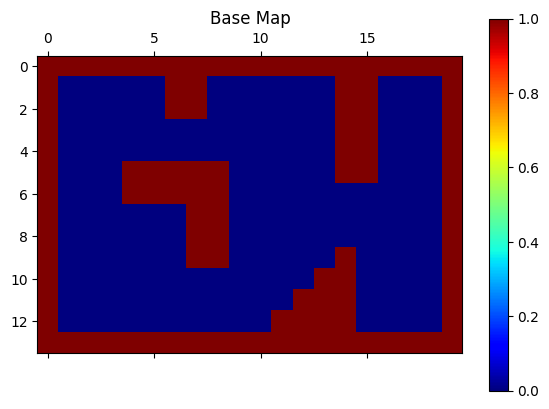

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Proposed Map
map=[
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# Convert Map 2D array to Numpy array
grid_map = np.array(map)

# Show grid map
plt.matshow(grid_map, cmap = "jet")
plt.title('Base Map')
plt.colorbar()


## Algorithm

In order to implement the Q-learning algorithm, you should follow the next pseudocode:

```verbatim
Initialize Q(s,a) to 0 or random
For n episodes:
    Initialize s randomly in any free cell
    repeat:
        Choose action 'a' following epsilon-greedy policy
        Take action a, observe r and s'
        Q(s,a) <- Q(s,a) + alpha * (r + gamma * max_a Q(s',a)) - Q(s,a)
        s <- s'
    until the episode terminates
endFor
```

You will have to set several parameters experimentally: n, m, epsilon, alpha and gamma.

## Environment

In the environment class, you set the possible actions, the rewards obtained depending of those actions and the state of the agent after the action is applied.

You have to fill the empty functions following the previous pseudocode.

In [2]:
import random
class MapEnv:
    def __init__(self, map, goal, max_steps):
        self.map = map
        self.current_state = self.reset()
        self.goal = goal.astype(np.int32)
        self.actions = 4
        self.steps = 0
        self.max_steps = max_steps
        if map[goal[0], goal[1]] != 0:
            raise ValueError("Goal position is an obstacle")

    def reset(self):
        # start the agent in a random position within the map and return agent state (cell in which it is)
        self.steps = 0
        free_cell = np.argwhere(self.map == 0)
        start_cell = random.choice(free_cell)
        return start_cell

    def step(self, action):
        # Applies the action taken and returns the obtained state, reward, and a boolean indicating if the episode has ended
        # action: 0 = up, 1 = down, 2 = left, 3 = right
        r, c = self.current_state

        if action == 0 and all([r > 0, self.map[r - 1, c] == 0]):
            r -= 1
        elif action == 1 and all([r < self.map.shape[0] - 1, self.map[r + 1, c] == 0]):
            r += 1
        elif action == 2 and all([c > 0, self.map[r, c - 1] == 0]):
            c -= 1
        elif action == 3 and all([c < self.map.shape[1] - 1, self.map[r, c + 1] == 0]):
            c += 1

        self.current_state = np.array([r, c])
        episode_termination = np.array_equal(self.current_state, self.goal) or self.steps >= self.max_steps

        if episode_termination:
            reward = 1 if np.array_equal(self.current_state, self.goal) else -1
        else:
            reward = -1

        self.steps += 1

        return self.current_state, reward, episode_termination

    def get_state(self):
       # returns current state
       self.current_state = self.reset()
       return self.current_state

    def render(self, i=0):
        plt.matshow(self.map, cmap = "jet")
        plt.title('Map')
        plt.colorbar()
        plt.scatter(self.current_state[1], self.current_state[0], c = 'r')
        plt.scatter(self.goal[1], self.goal[0], c = 'g')
        plt.savefig("q_learning_{0:04}.png".format(i), dpi = 300)
        plt.show()

## QLearning algorithm

QLearning class creates and trains the policy at every episode using the information provided by the environment. After the training is over, the optimal policy and the value function are obtained.

As in the MapEnv class, you have to fill the empty functions following the previous pseudocode.

In [3]:
class QLearning:
    def __init__(self, env, alpha, gamma, epsilon, n_episodes, max_steps):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.n_episodes = n_episodes
        self.max_steps = max_steps
        self.Q = np.random.rand(env.map.shape[0], env.map.shape[1], env.actions)

    def epsilon_greedy_policy(self, s, epsilon):
        # Epsilon greedy policy (choose a random action with probability epsilon)
        if np.random.rand() < epsilon:
            return np.random.choice(self.env.actions)
        else:
            return np.argmax(self.Q[s[0], s[1]])

    def episode(self, alpha, epsilon):
        # Episode execution. Generate an action with epsilon_greedy_policy, call step, appy learning function
        # This function should return the total reward obtained in this episode

        total_reward = 0
        s = self.env.get_state()
        for i in range(self.max_steps):
            a = self.epsilon_greedy_policy(s, epsilon)
            next_s, r, episode_termination = self.env.step(a)

            self.Q[s[0], s[1], a] += alpha * (r + self.gamma * np.max(self.Q[next_s[0], next_s[1]]) - self.Q[s[0], s[1], a])

            total_reward += r
            s = next_s
            if episode_termination:
               break

        return total_reward

    def train(self, n_episodes, check_every_n=100):
        """Execute n_episodes and every `check_every_n` episodes print the average reward and store it.
           As the initial position is random, this number will not be super stable..."""

        average_rewards = []
        for i in range(1, n_episodes + 1):
            # Run a single training episode
            self.episode(self.alpha, self.epsilon)
            # Calculate and log the average reward every `check_every_n` episodes
            if i % check_every_n == 0:
                total_reward = 0
                for _ in range(check_every_n):
                    total_reward += self.episode(0, 0)
                average_reward = total_reward / check_every_n
                average_rewards.append(average_reward)
                print(f"Average reward for episodes {i - check_every_n + 1} to {i}: {average_reward:.2f}")
        return average_rewards

    def get_optimal_policy(self):
        """Once training is done, retrieve the optimal policy from Q(s,a)."""
        policy = np.argmax(self.Q, axis = 2)
        policy[self.env.map == 1] = -1
        policy[self.env.goal[0], self.env.goal[1]] = -2
        return policy

    def value_function(self):
        """Once training is done, retrieve the optimal value function from from Q(s,a)"""
        v = np.max(self.Q, axis = 2)
        v[self.env.map == 1] = -np.inf
        return v


## Training

For the training you need to choose some parameters experimentally. Test different values to see how the training results change.

Parameters:

* **alpha**: learning rate of the algorithm
* **gamma**: discount factor of the algorithm
* **epsilon**: random action probability
* **n_episodes**: number of episode repetitions
* **max_steps**: maximum number of iterations per episode (in Environment class)

Average reward for episodes 1 to 100: -90.12
Average reward for episodes 101 to 200: -91.96
Average reward for episodes 201 to 300: -91.99
Average reward for episodes 301 to 400: -86.09
Average reward for episodes 401 to 500: -81.39
Average reward for episodes 501 to 600: -78.54
Average reward for episodes 601 to 700: -84.27
Average reward for episodes 701 to 800: -80.55
Average reward for episodes 801 to 900: -66.80
Average reward for episodes 901 to 1000: -68.17
Average reward for episodes 1001 to 1100: -64.05
Average reward for episodes 1101 to 1200: -53.13
Average reward for episodes 1201 to 1300: -59.88
Average reward for episodes 1301 to 1400: -60.87
Average reward for episodes 1401 to 1500: -51.72
Average reward for episodes 1501 to 1600: -55.41
Average reward for episodes 1601 to 1700: -57.45
Average reward for episodes 1701 to 1800: -38.66
Average reward for episodes 1801 to 1900: -52.84
Average reward for episodes 1901 to 2000: -54.21
Average reward for episodes 2001 to 2100:

Text(0.5, 1.0, 'Reward per episode')

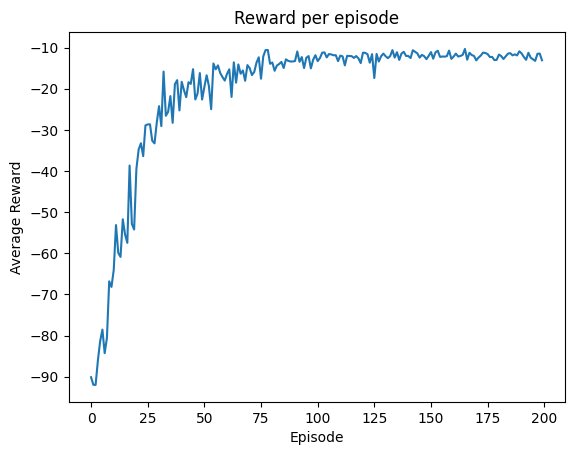

In [4]:
# Create an environment and a QLearning agent to learn it. Plot the averaged rewards stored.

env = MapEnv(grid_map, np.array([3, 17]), max_steps = 100)
alpha = 0.1
gamma = 0.9
epsilon = 0.3
n_episodes = 20000
max_steps = 100
ql = QLearning(env, alpha, gamma, epsilon, n_episodes, max_steps)
rewards = ql.train(n_episodes)
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Reward per episode")

## Plot value function and optimal policy

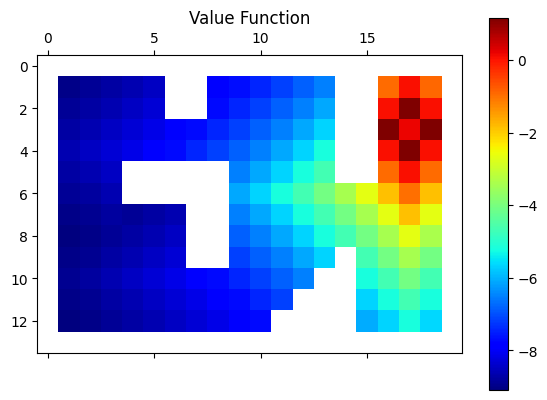

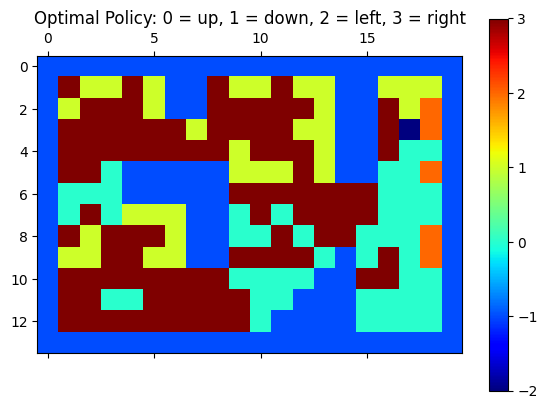

In [5]:
# Plot the value function (see included figure)
v = ql.value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

# Plot policy (see included figure)
policy = ql.get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()

## Test current Policy

Once the training is over, we can see what the robot has learnt to do. You can test it with other goal positions and other maps, to see of the policy is able to adapt to other situations.

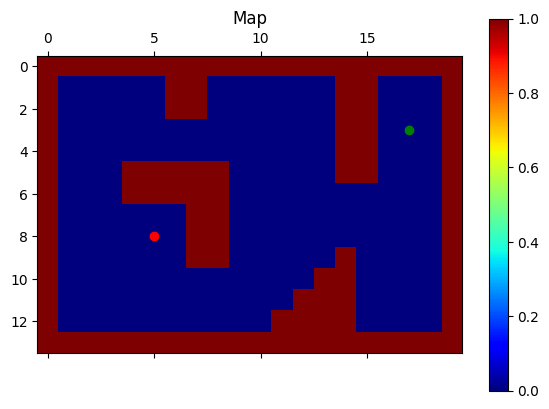

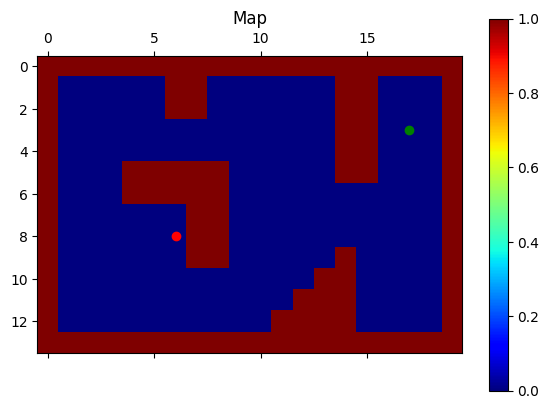

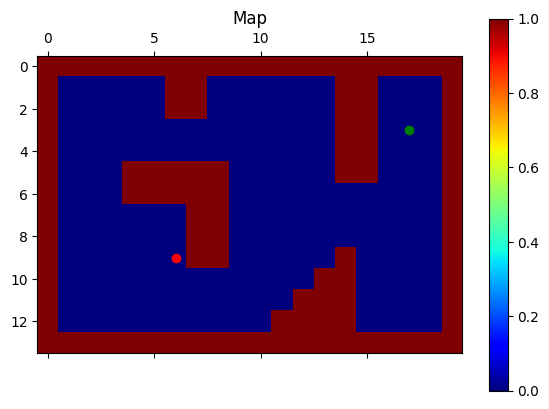

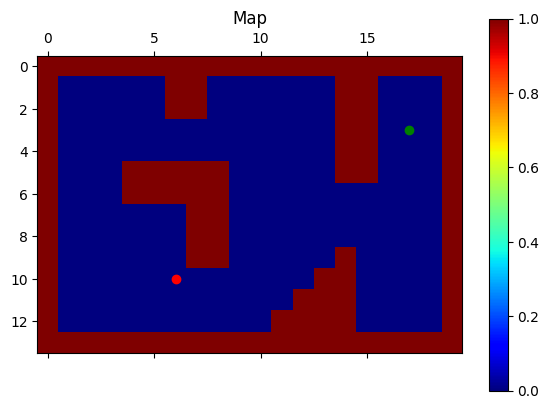

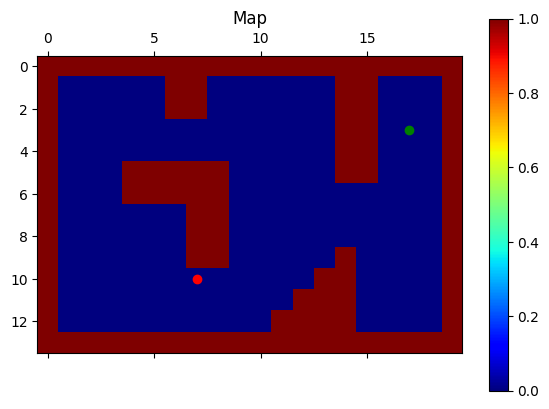

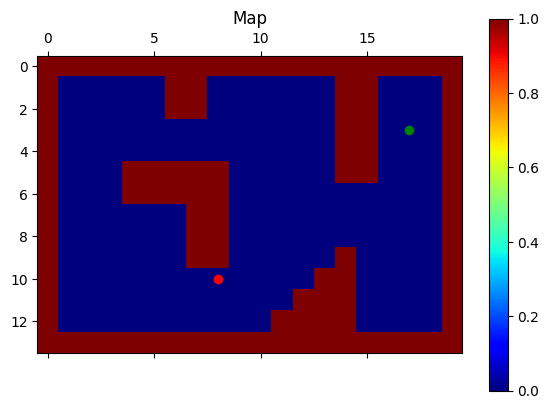

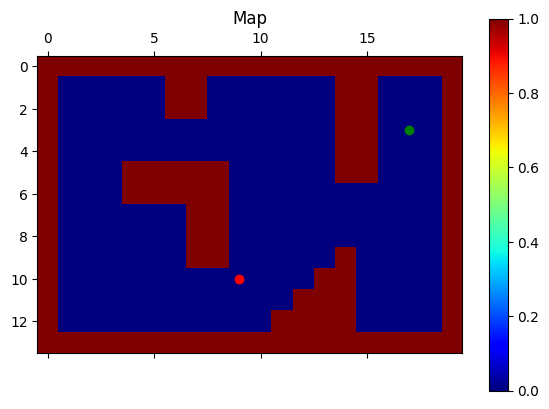

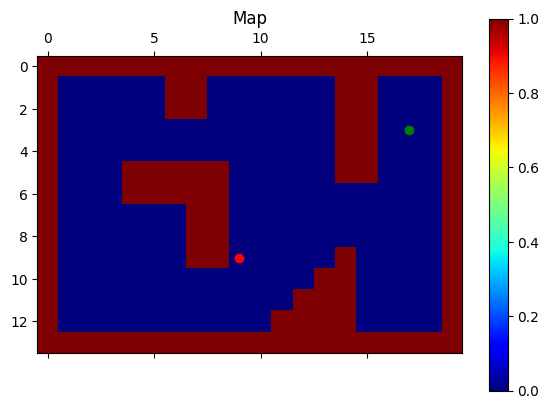

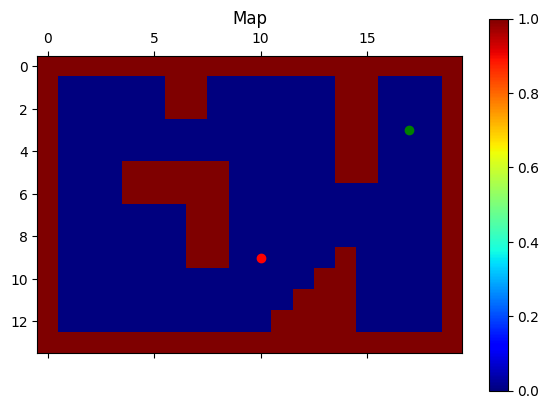

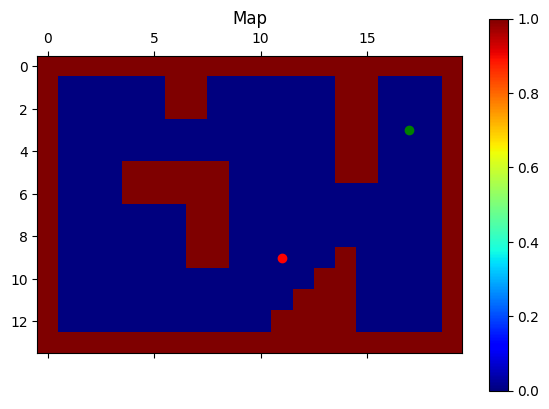

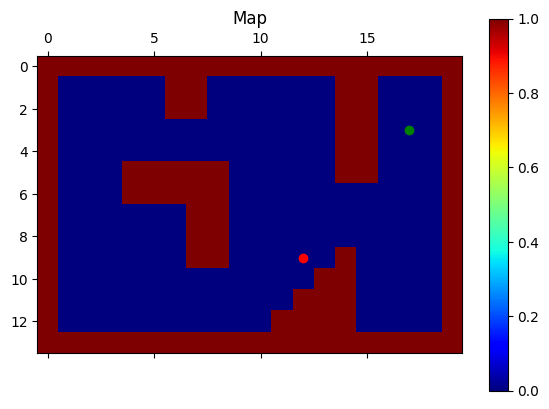

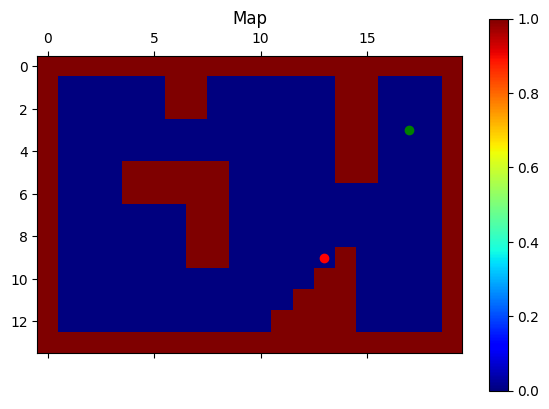

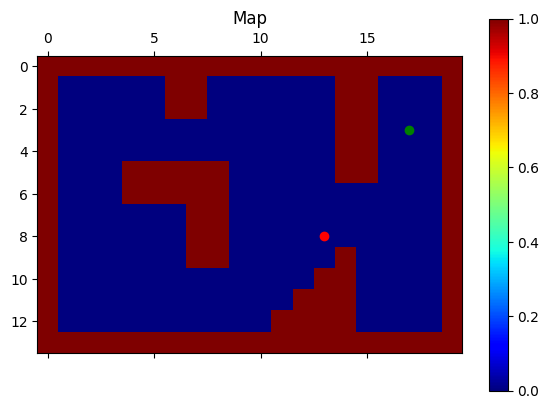

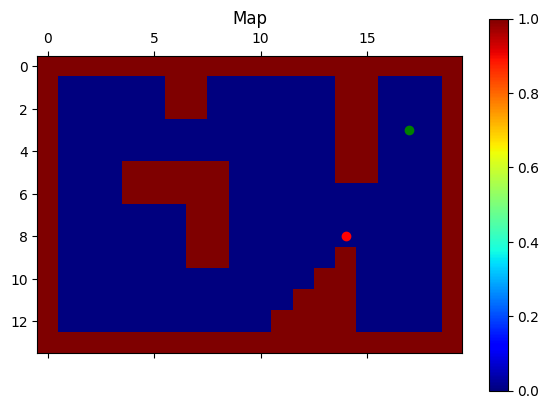

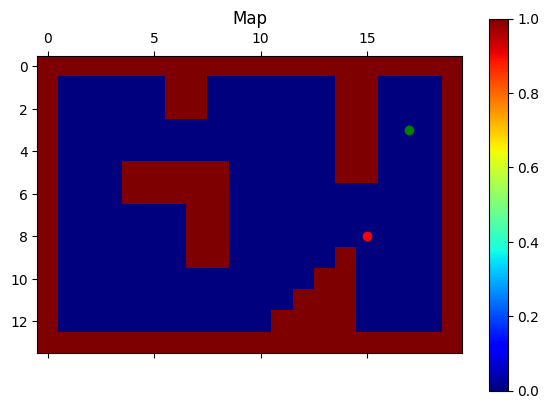

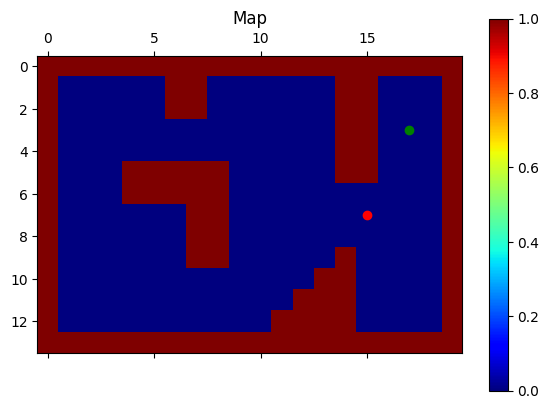

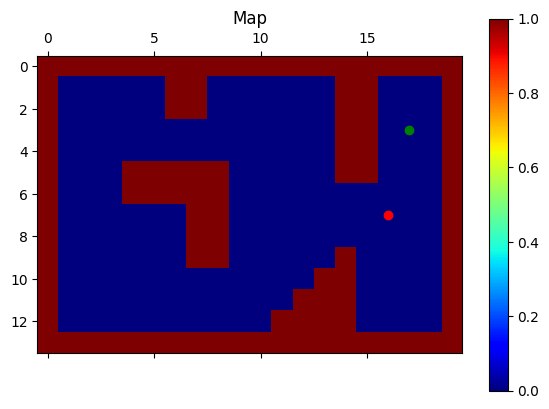

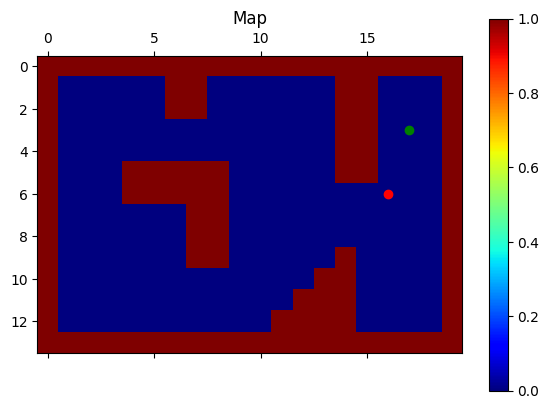

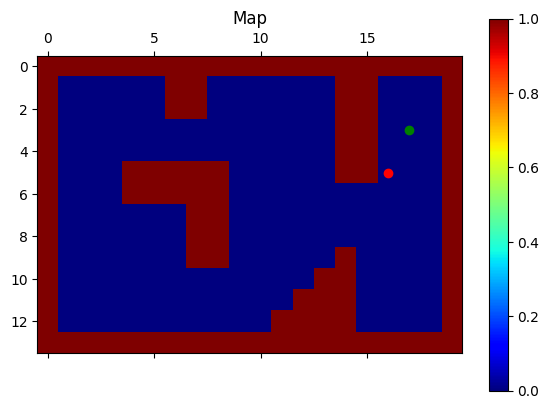

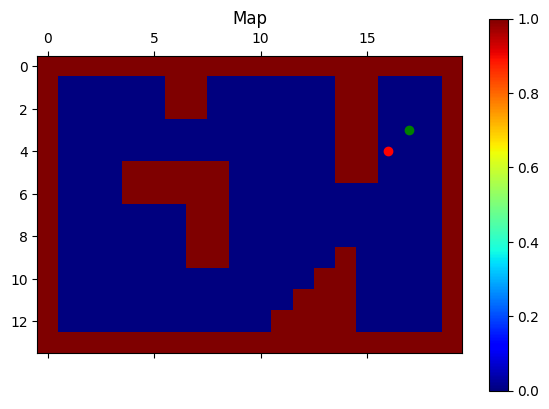

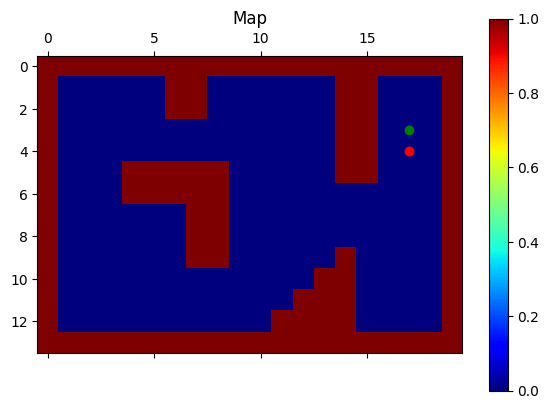

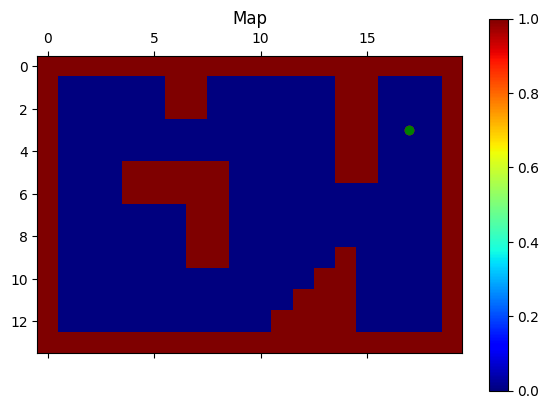

In [6]:
# generate an animation with the agent solving the maze

env = MapEnv(grid_map, np.array([3, 17]), max_steps)
i = 0

for j in range(1):
    episode_termination = False
    s = env.get_state()
    while not episode_termination:
        a = policy[s[0], s[1]]
        s, reward, episode_termination = env.step(a)
        env.render(i)
        i += 1

Testing other parameters:

Average reward for episodes 1 to 100: -92.01
Average reward for episodes 101 to 200: -82.31
Average reward for episodes 201 to 300: -90.20
Average reward for episodes 301 to 400: -74.96
Average reward for episodes 401 to 500: -66.19
Average reward for episodes 501 to 600: -58.72
Average reward for episodes 601 to 700: -55.40
Average reward for episodes 701 to 800: -51.10
Average reward for episodes 801 to 900: -57.41
Average reward for episodes 901 to 1000: -51.93
Average reward for episodes 1001 to 1100: -43.80
Average reward for episodes 1101 to 1200: -34.37
Average reward for episodes 1201 to 1300: -26.13
Average reward for episodes 1301 to 1400: -23.92
Average reward for episodes 1401 to 1500: -30.35
Average reward for episodes 1501 to 1600: -24.19
Average reward for episodes 1601 to 1700: -25.03
Average reward for episodes 1701 to 1800: -31.64
Average reward for episodes 1801 to 1900: -20.43
Average reward for episodes 1901 to 2000: -18.91
Average reward for episodes 2001 to 2100:

Text(0.5, 1.0, 'Reward per episode')

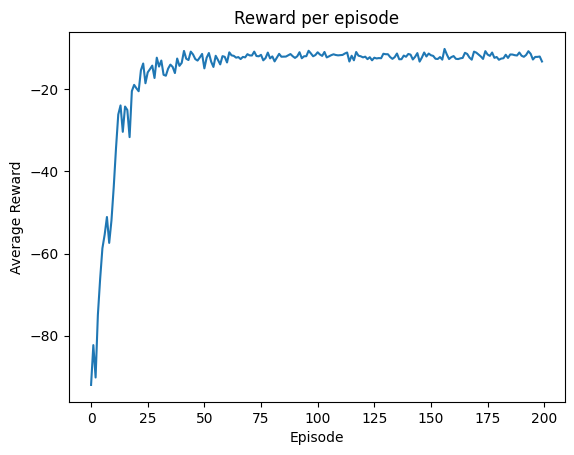

In [4]:
# Create an environment and a QLearning agent to learn it. Plot the averaged rewards stored.

env = MapEnv(grid_map, np.array([3, 17]), max_steps = 100)
alpha = 0.2
gamma = 0.9
epsilon = 0.4
n_episodes = 20000
max_steps = 100
ql = QLearning(env, alpha, gamma, epsilon, n_episodes, max_steps)
rewards = ql.train(n_episodes)
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Reward per episode")

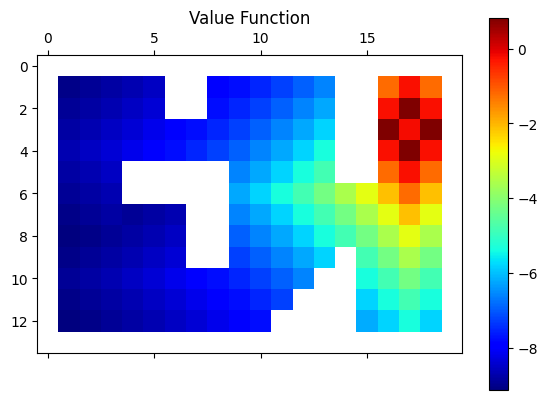

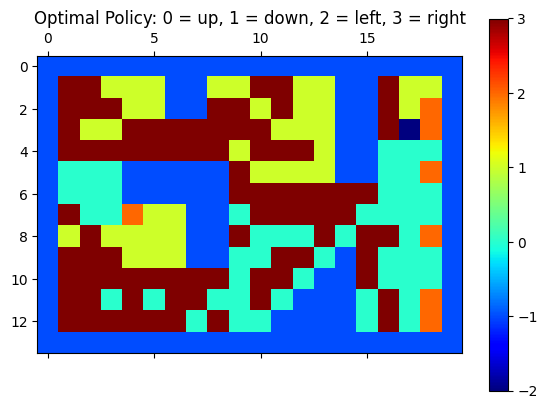

In [5]:
# Plot the value function (see included figure)
v = ql.value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

# Plot policy (see included figure)
policy = ql.get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()

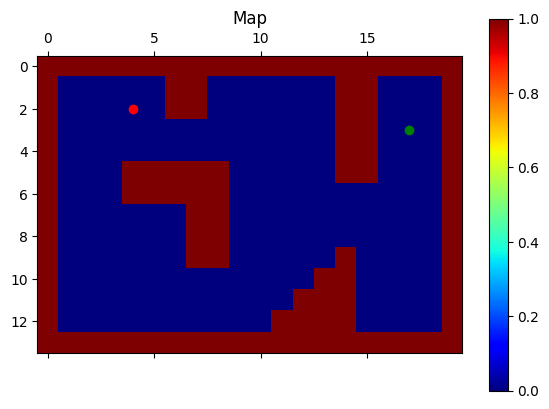

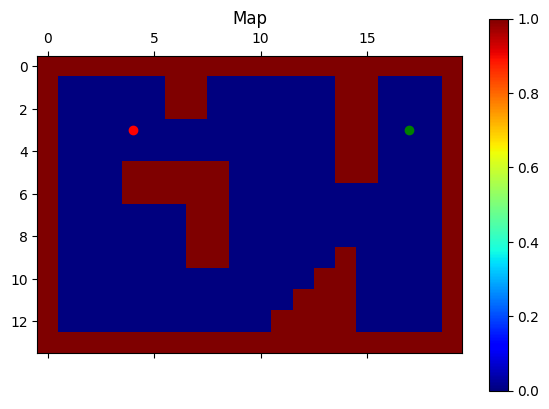

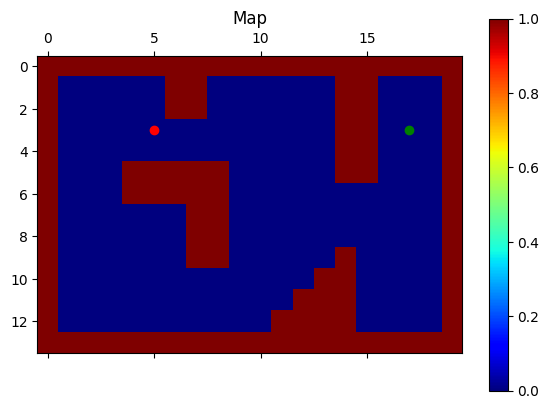

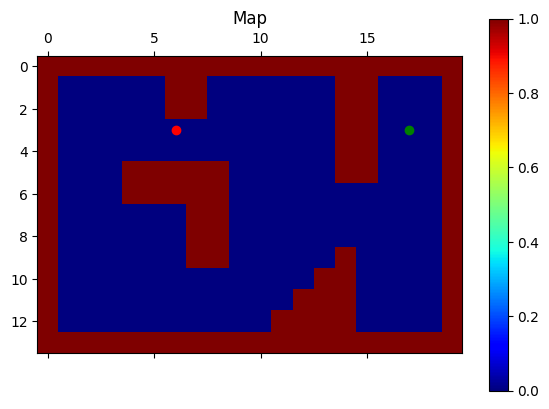

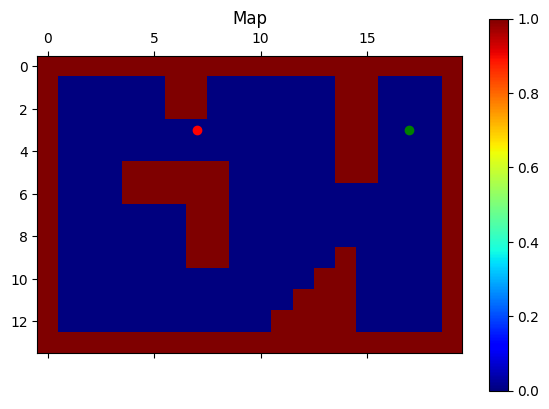

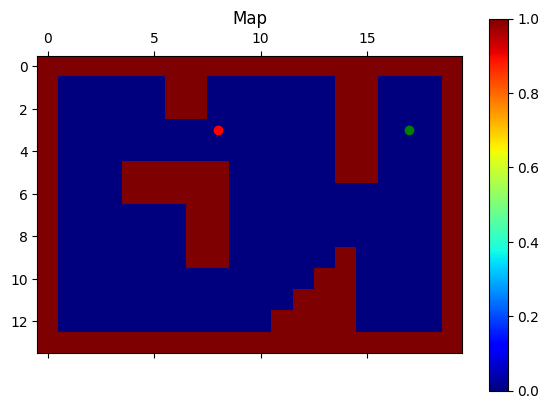

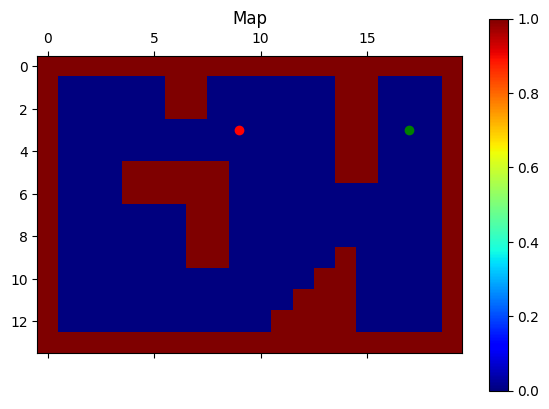

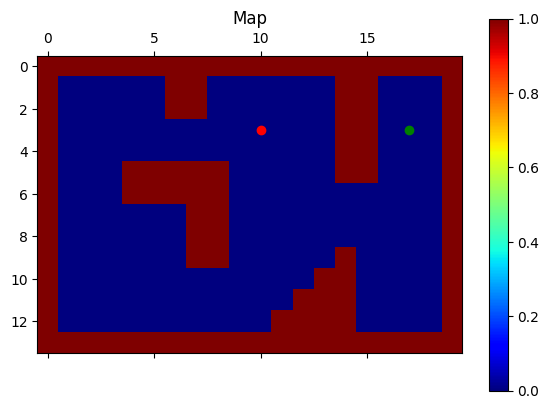

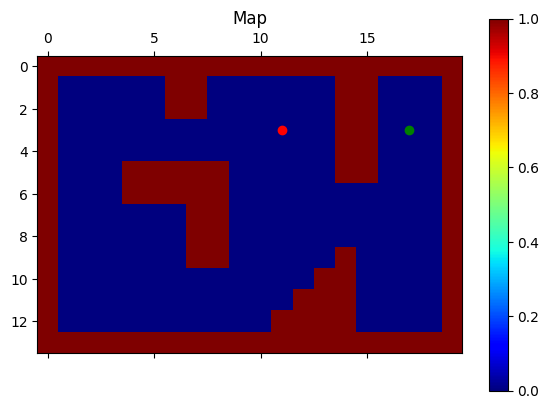

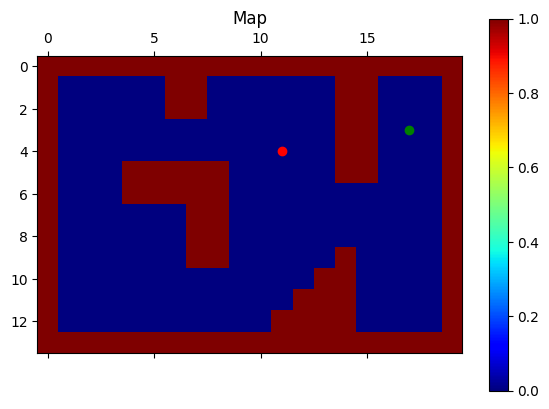

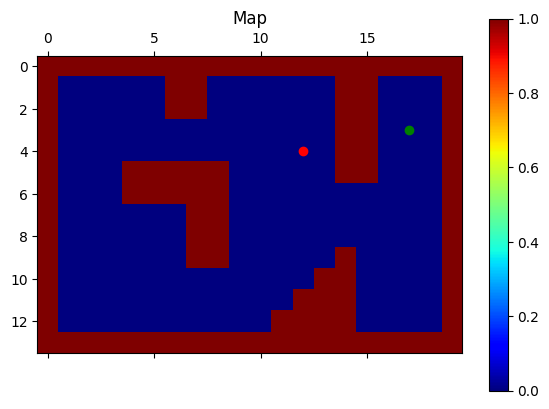

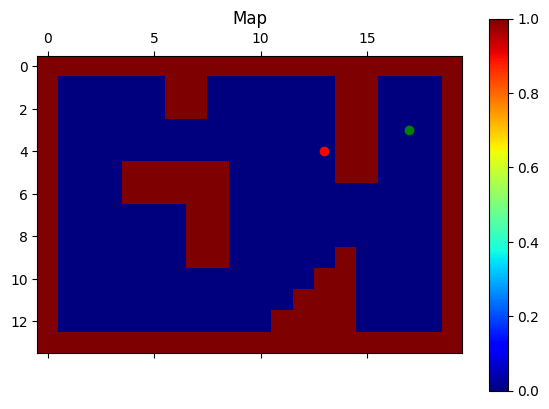

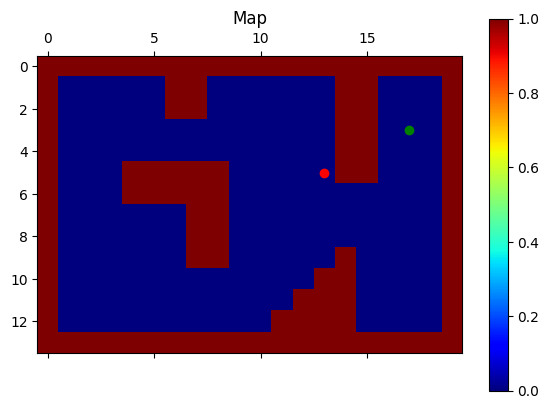

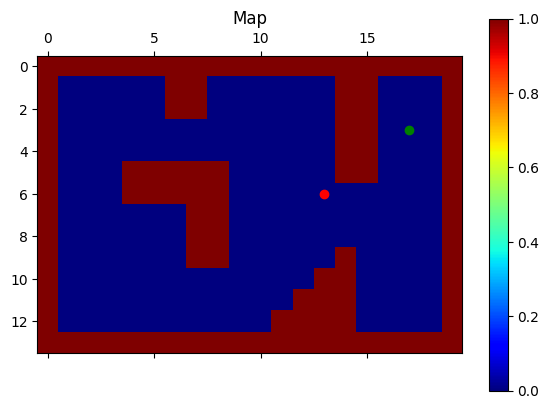

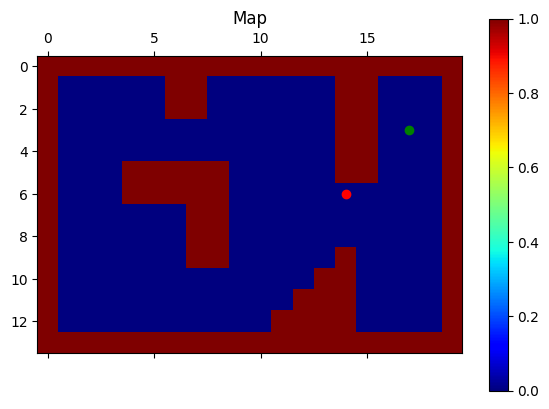

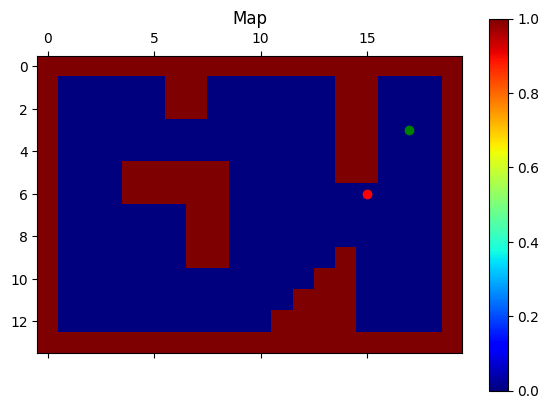

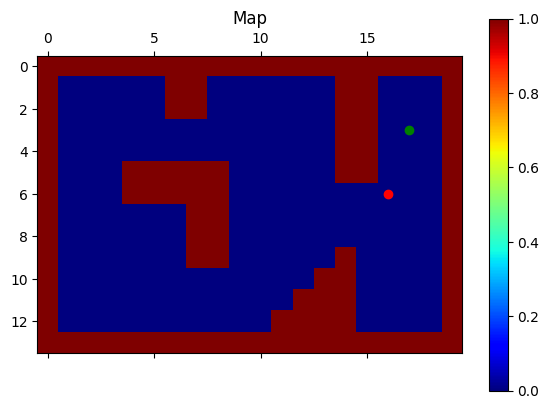

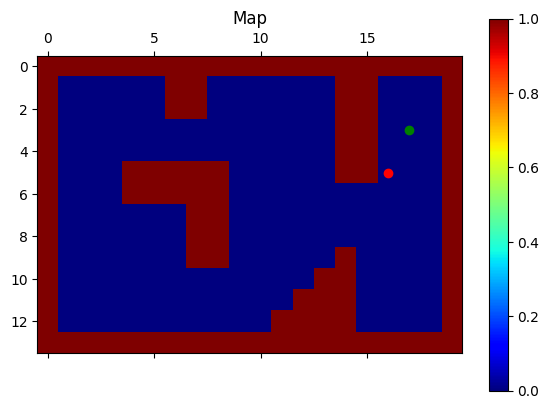

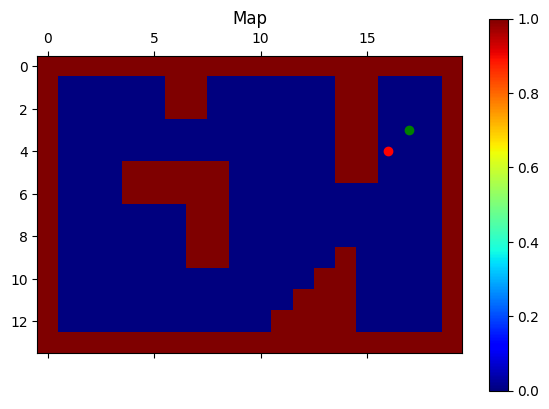

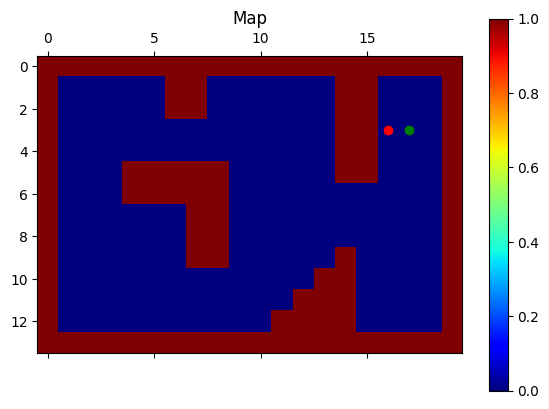

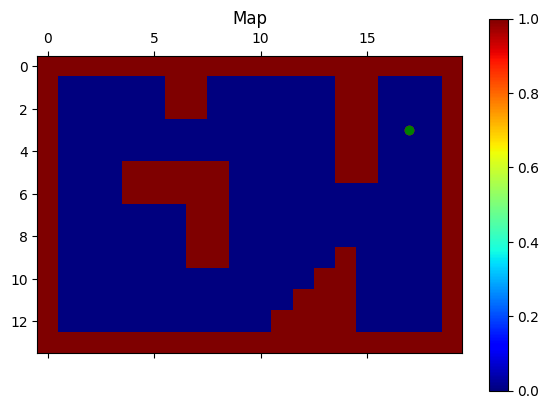

In [6]:
# generate an animation with the agent solving the maze

env = MapEnv(grid_map, np.array([3, 17]), max_steps)
i = 0

for j in range(1):
    episode_termination = False
    s = env.get_state()
    while not episode_termination:
        a = policy[s[0], s[1]]
        s, reward, episode_termination = env.step(a)
        env.render(i)
        i += 1

## Other environemnts

Create a new map (min size 15 x 15).

Answer:

* The policy you have just learned is able to solve this map?
* If not, the algorithm you have implemented is able to learn a new policy to solve this map? Demonstrate one or the other

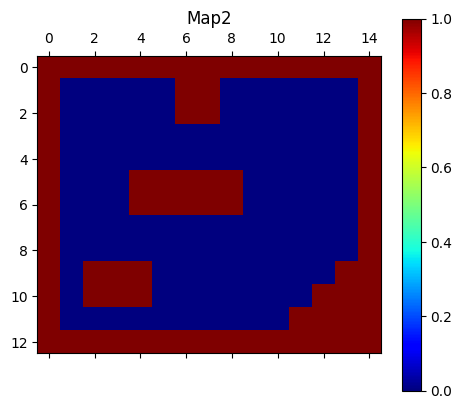

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# Proposed 15x15 Map
map_15x15 = [
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1],
    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1],
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
]

# Convert Map 2D array to Numpy array
grid_map = np.array(map_15x15)

# Show the grid map
plt.matshow(grid_map, cmap="jet")
plt.title('Map2')
plt.colorbar()
plt.show()


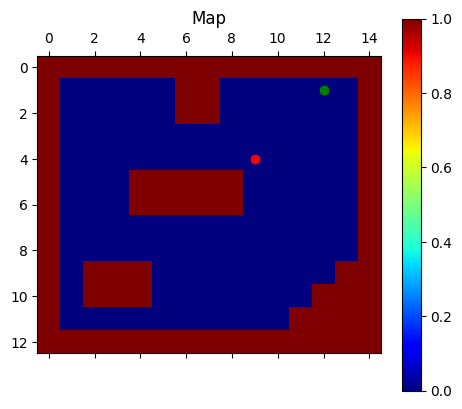

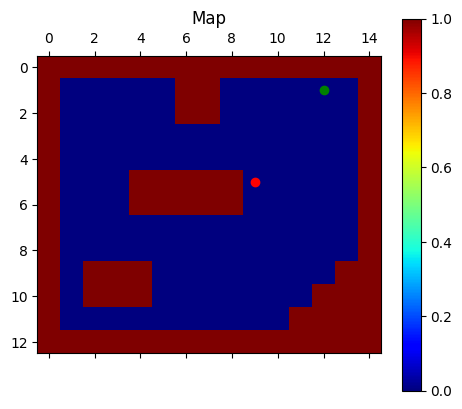

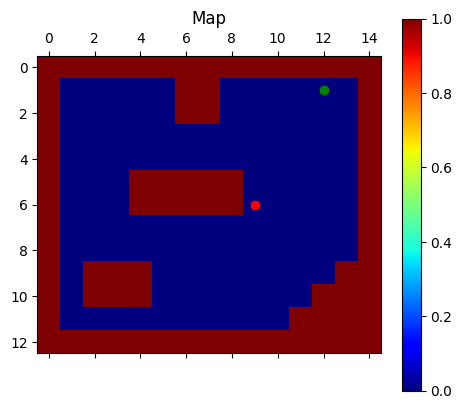

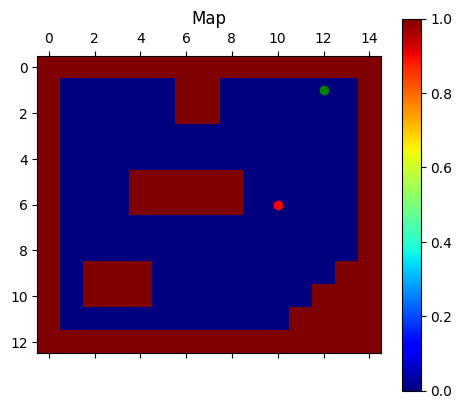

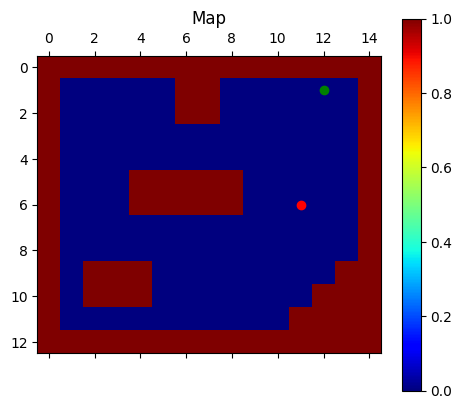

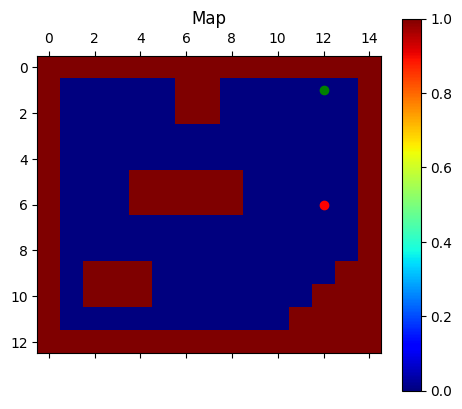

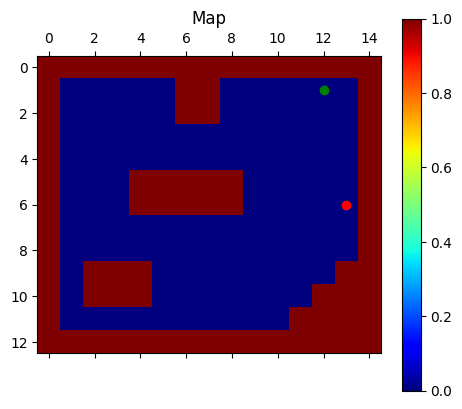

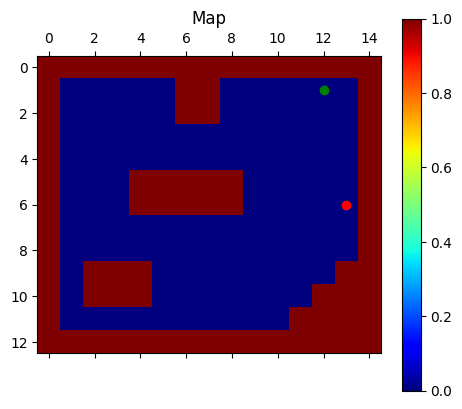

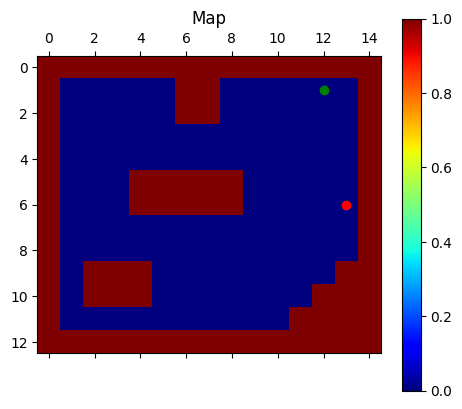

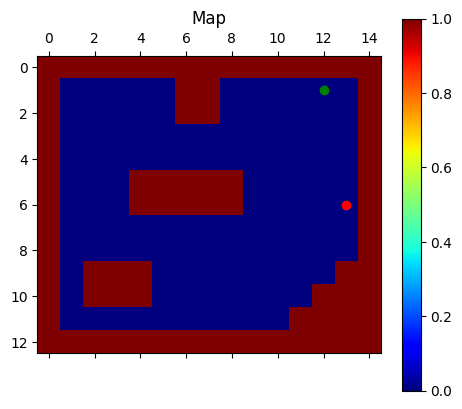

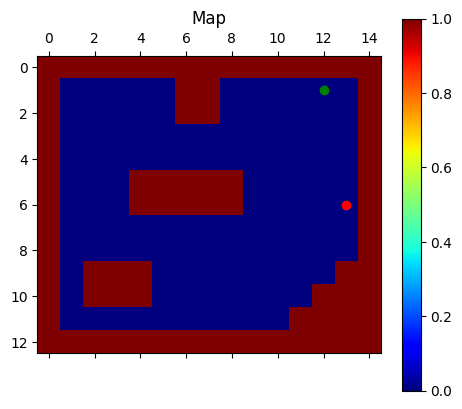

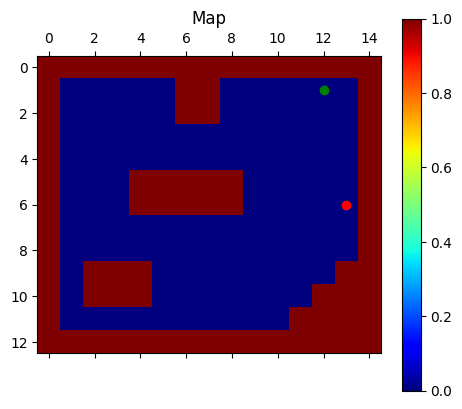

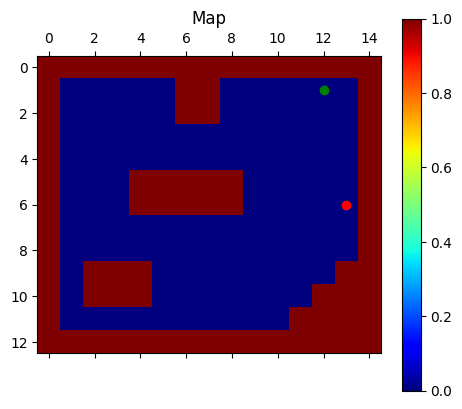

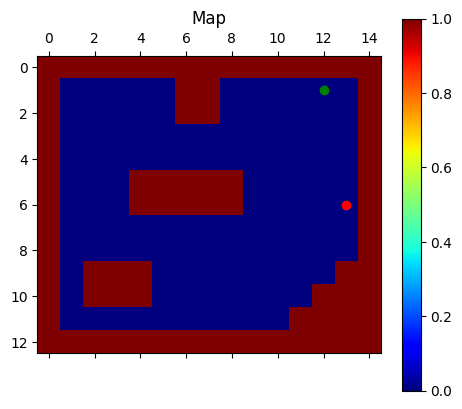

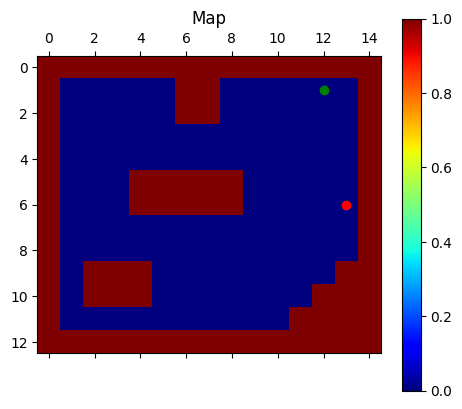

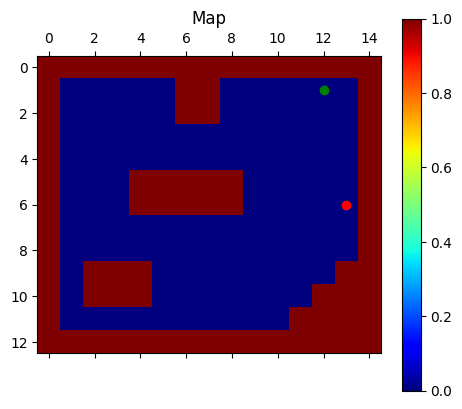

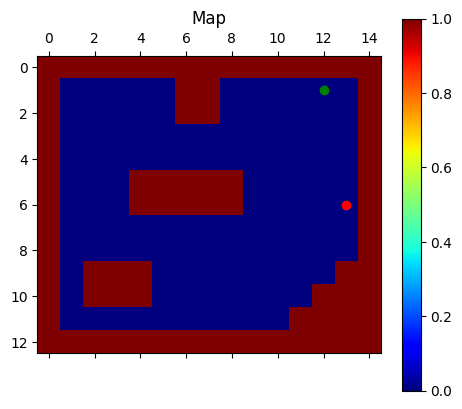

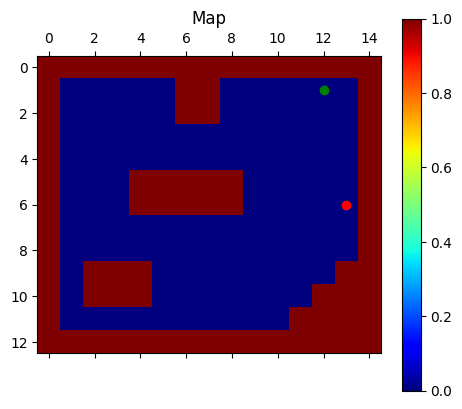

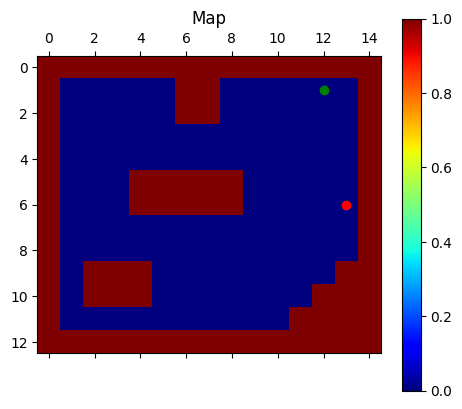

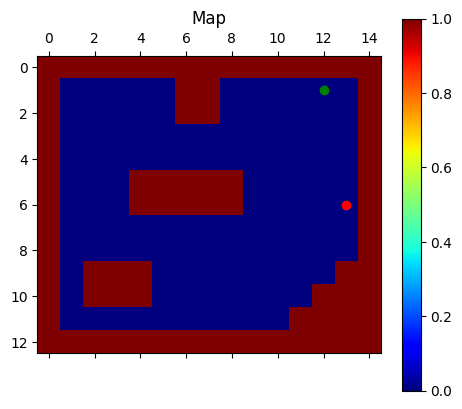

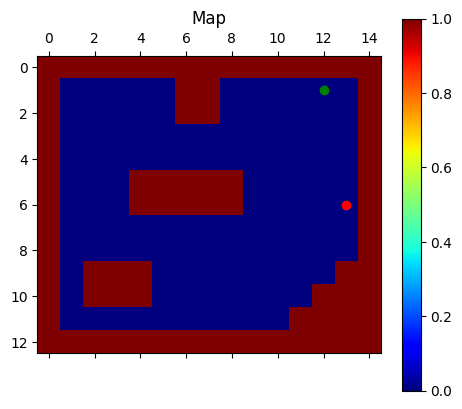

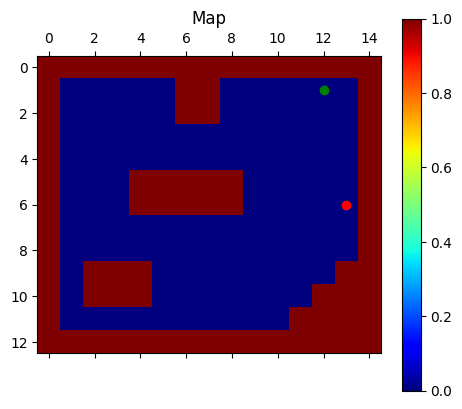

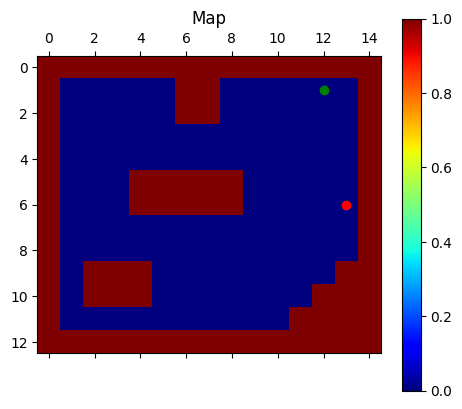

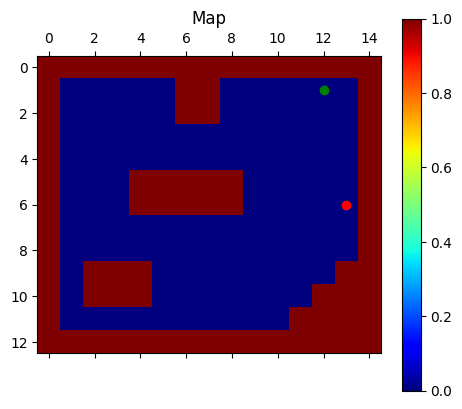

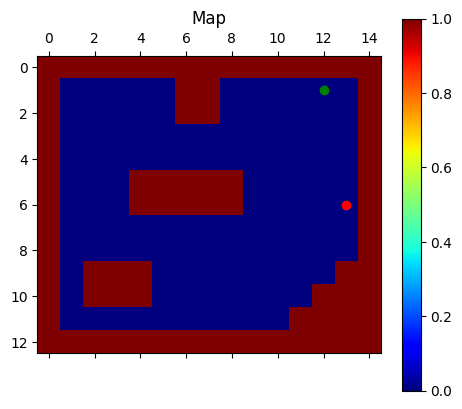

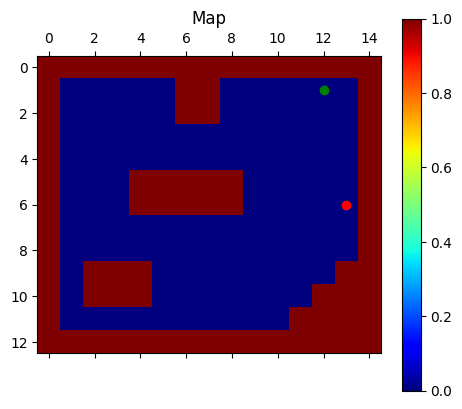

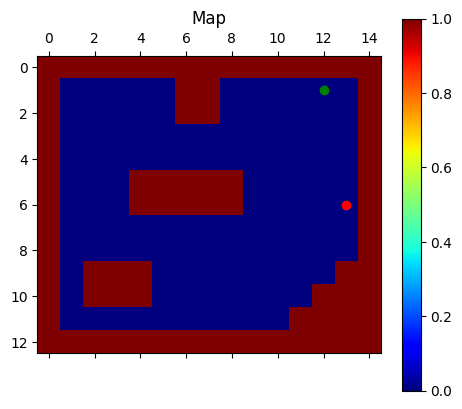

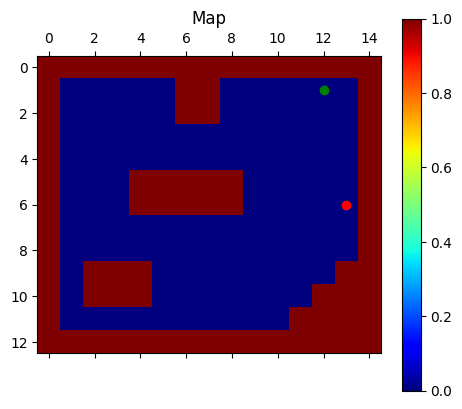

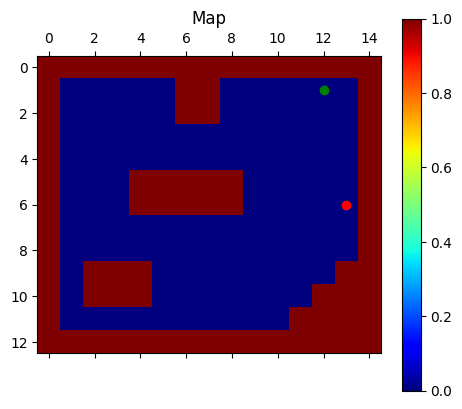

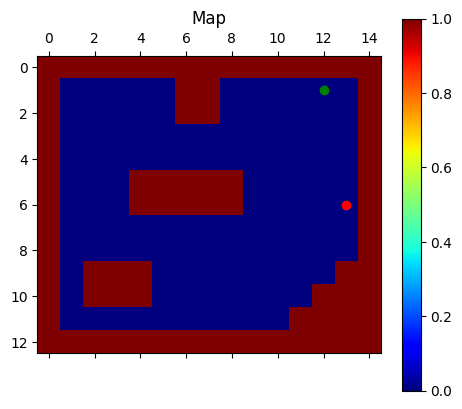

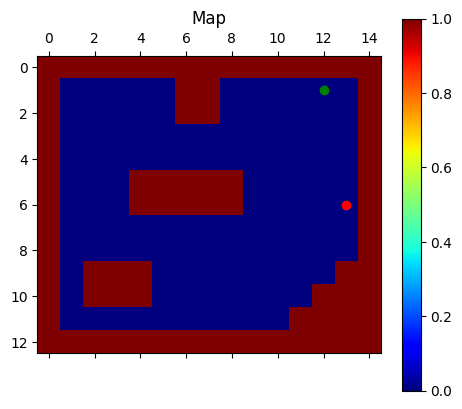

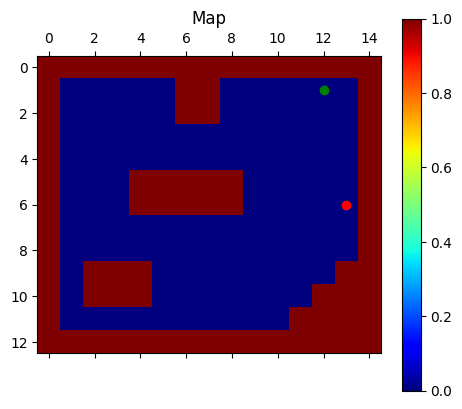

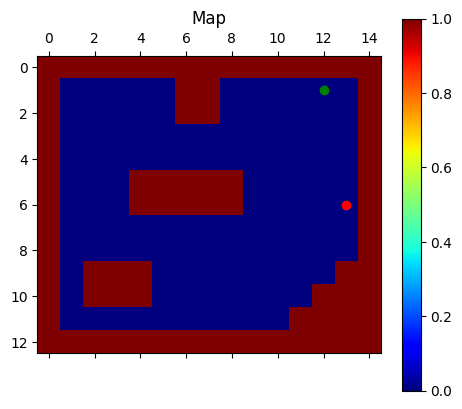

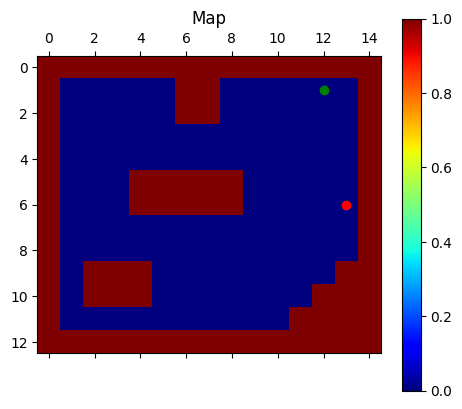

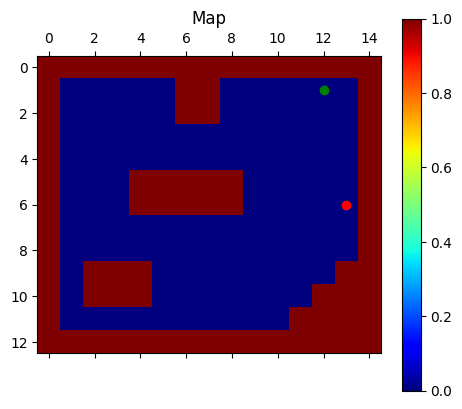

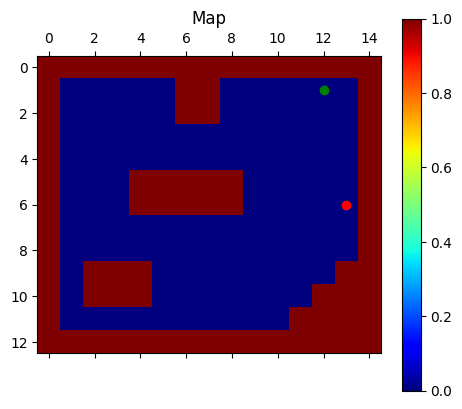

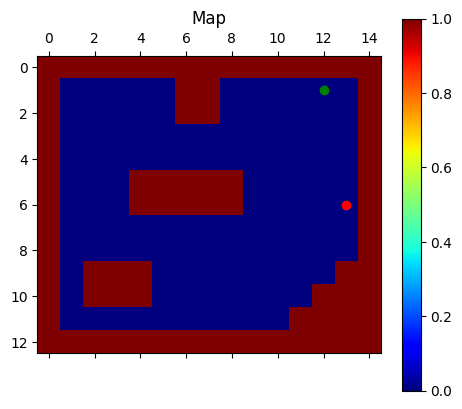

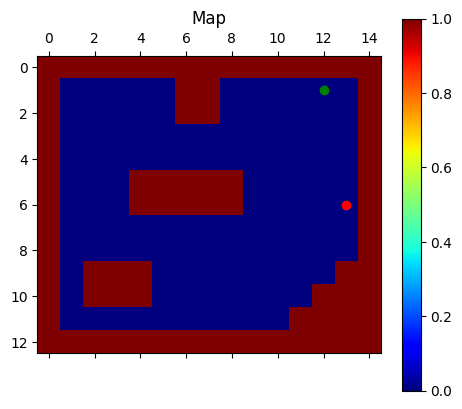

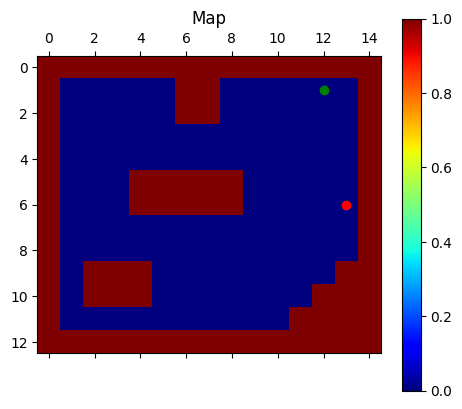

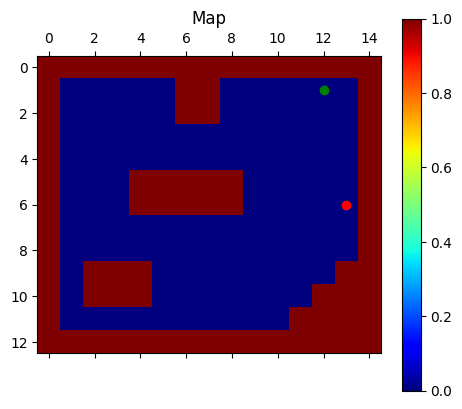

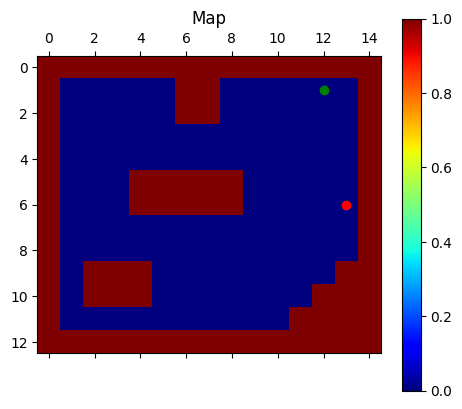

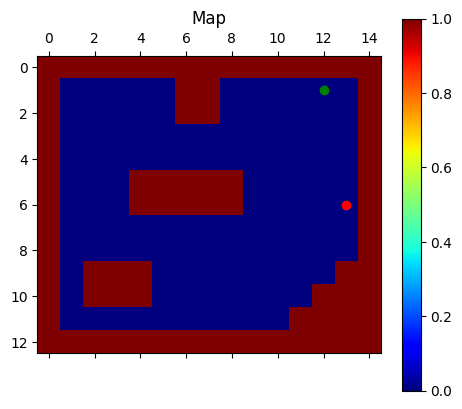

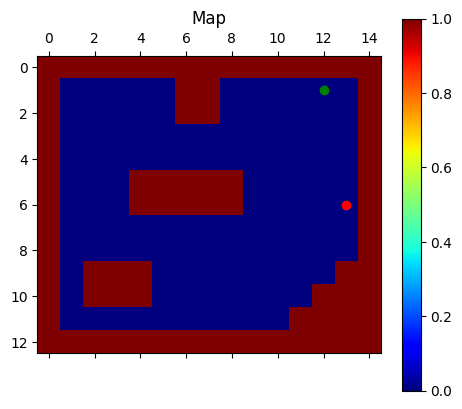

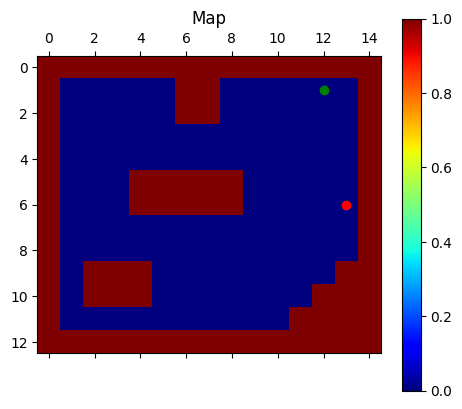

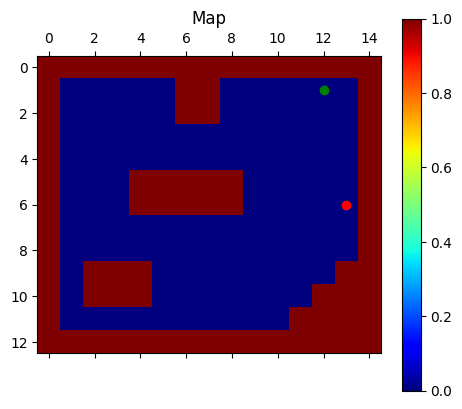

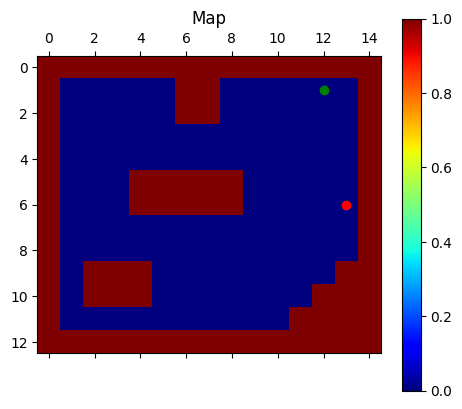

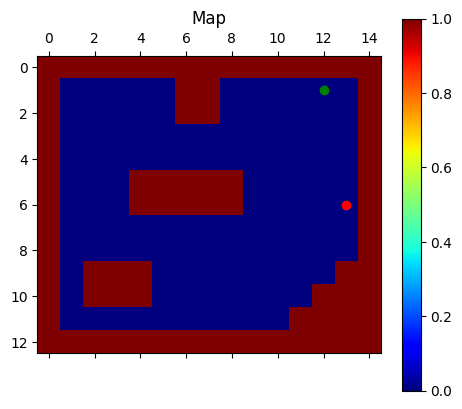

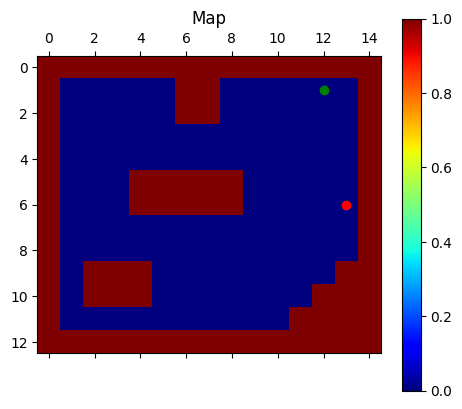

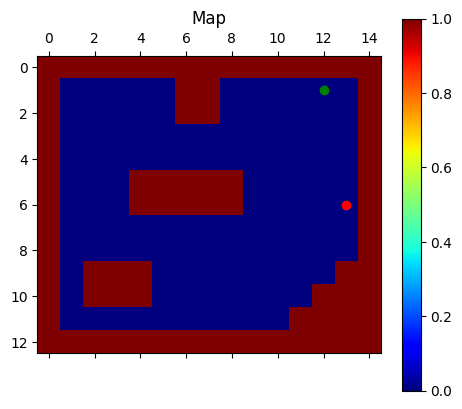

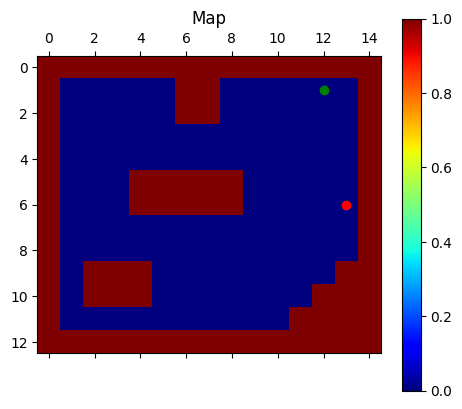

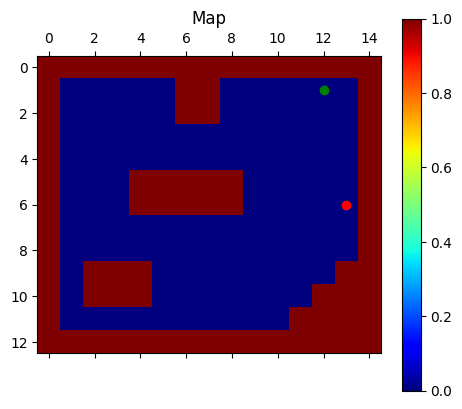

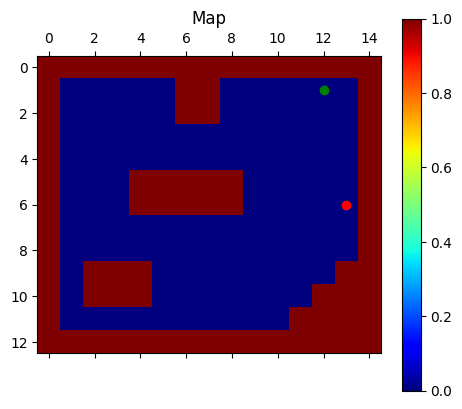

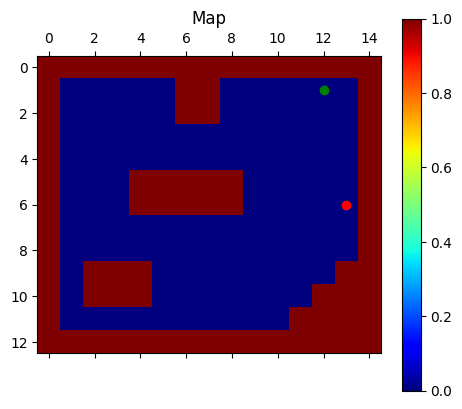

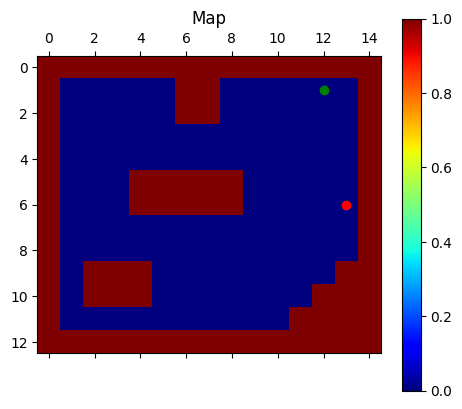

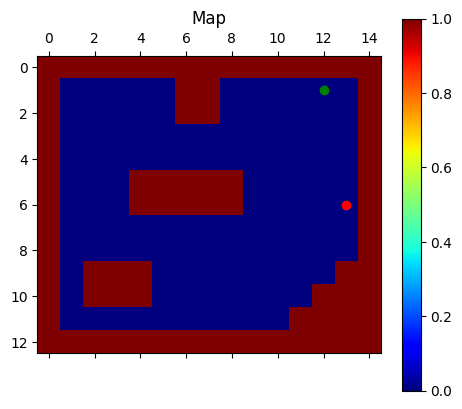

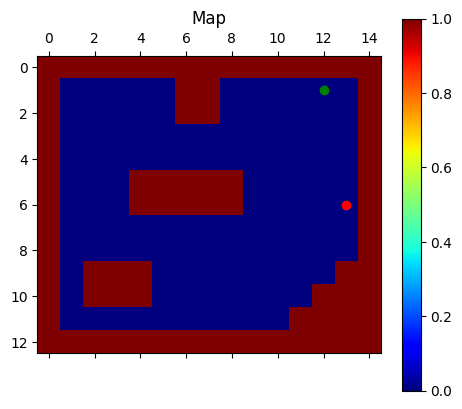

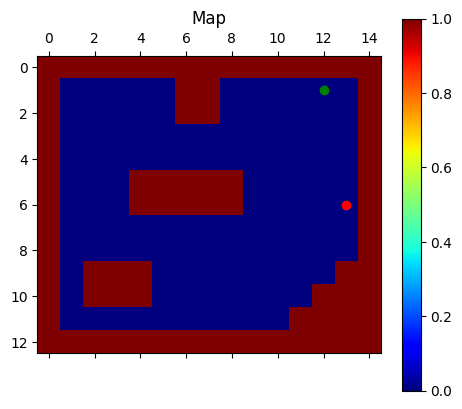

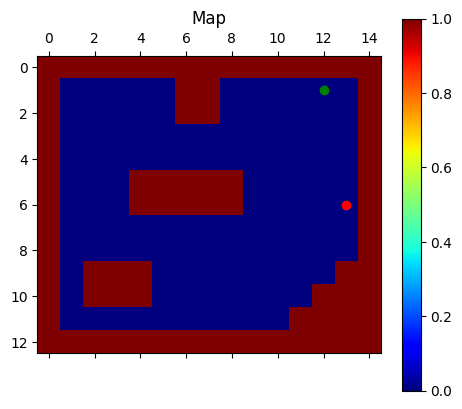

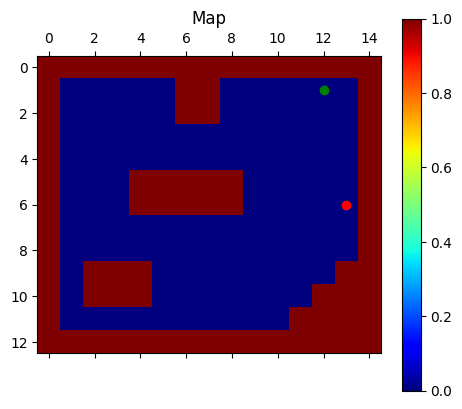

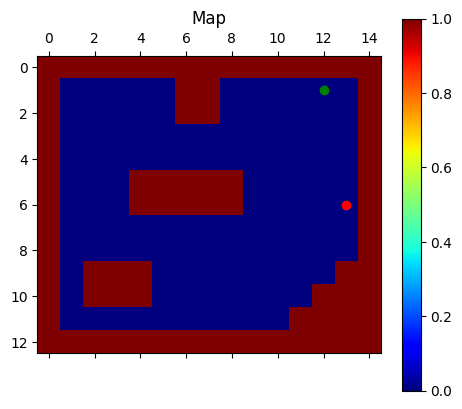

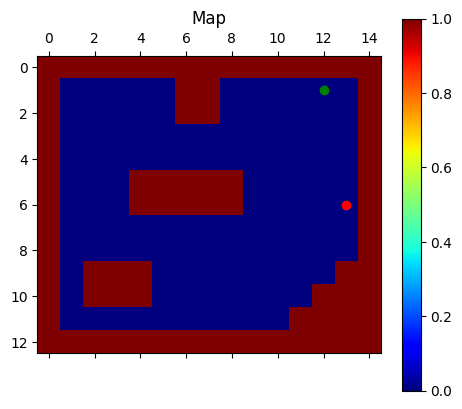

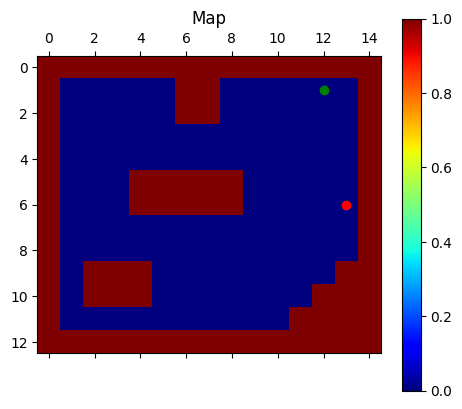

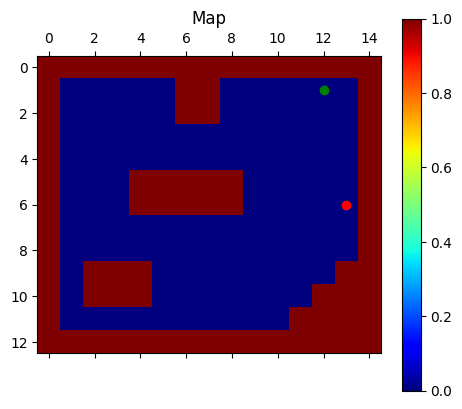

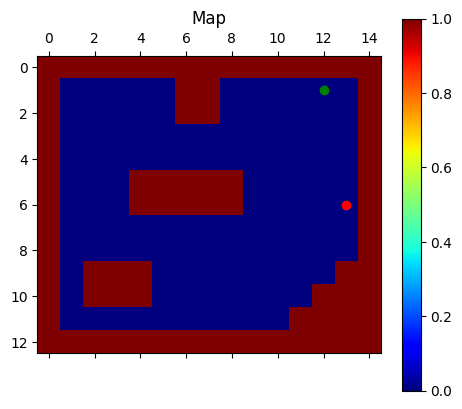

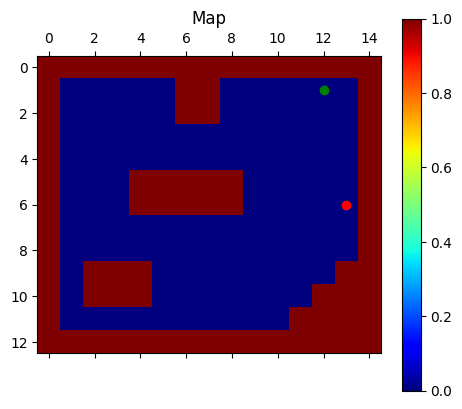

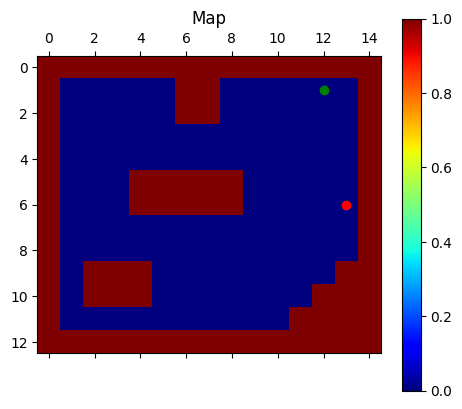

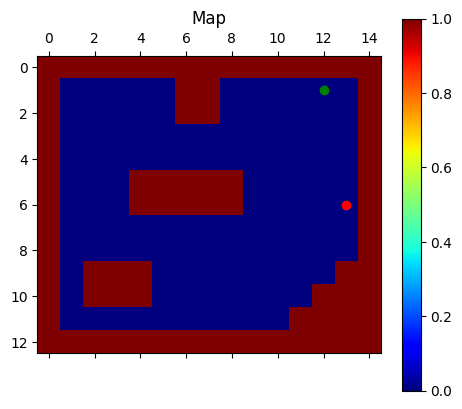

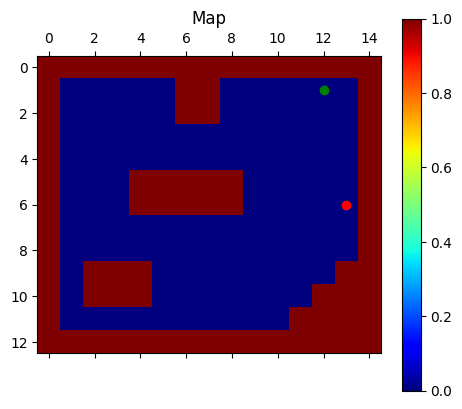

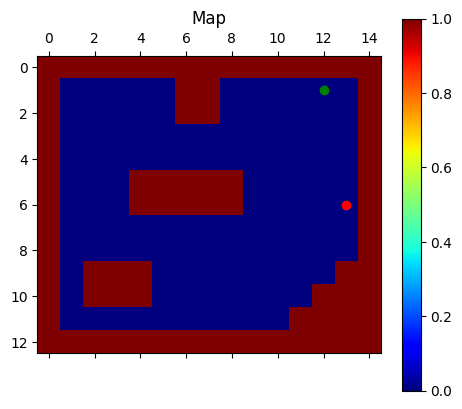

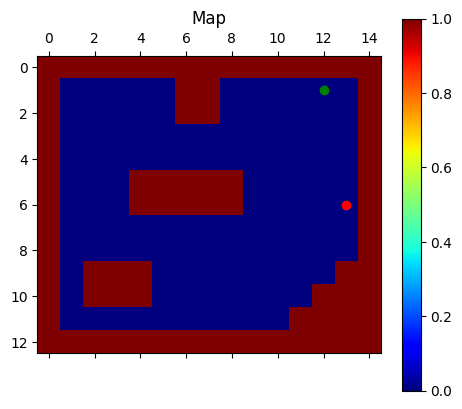

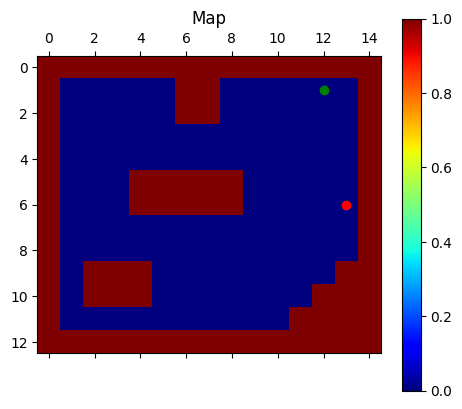

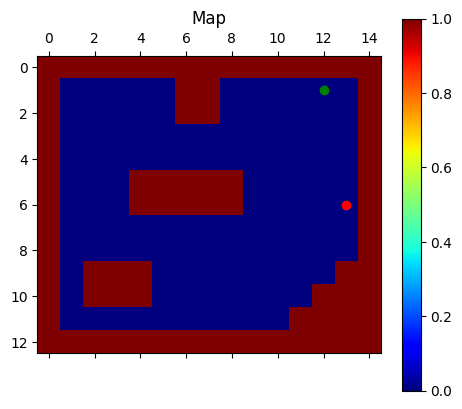

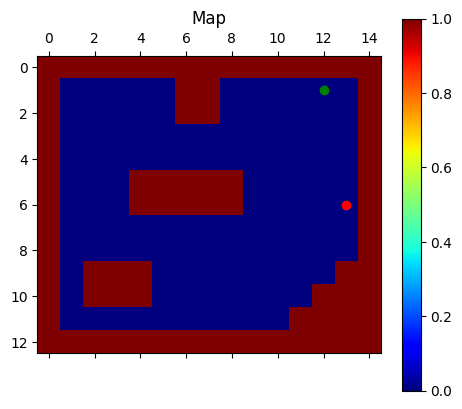

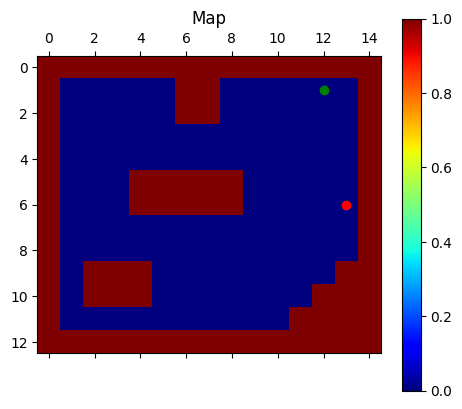

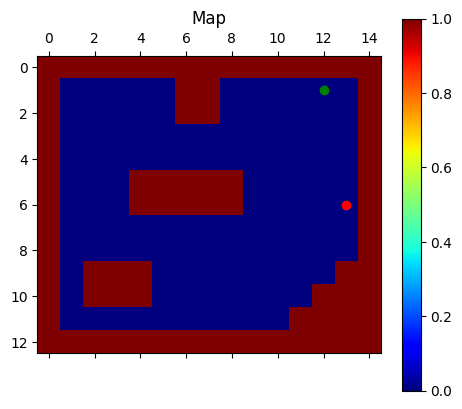

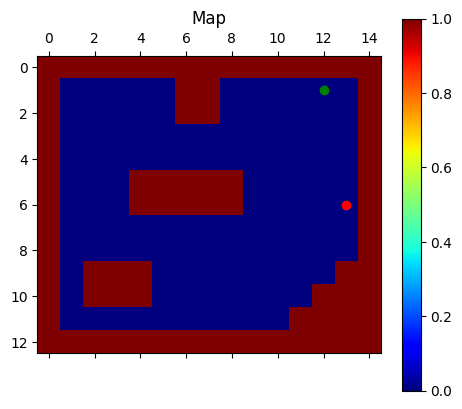

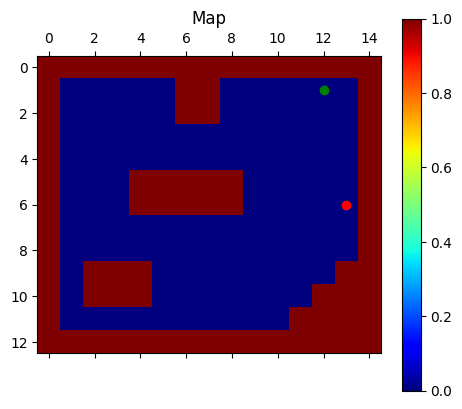

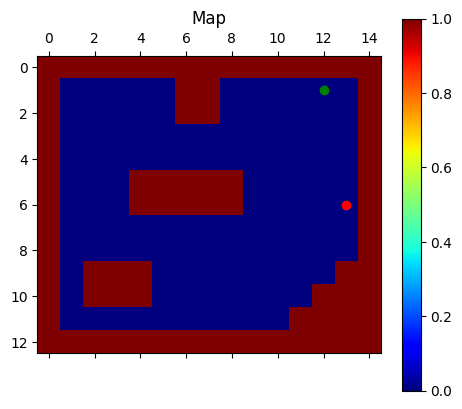

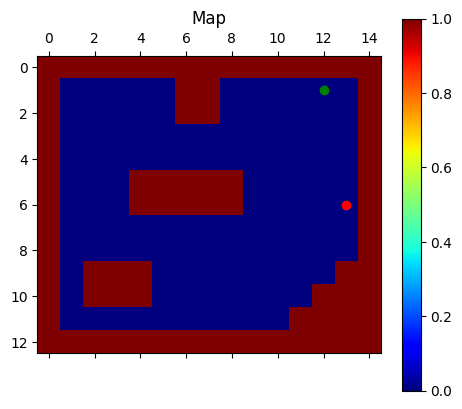

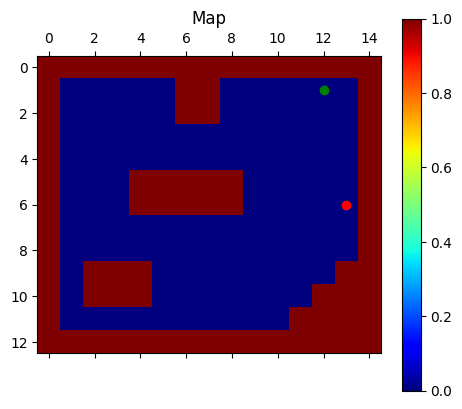

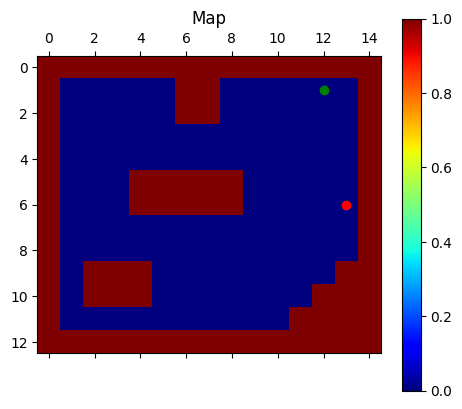

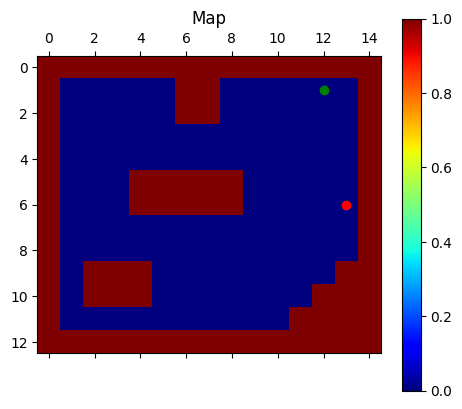

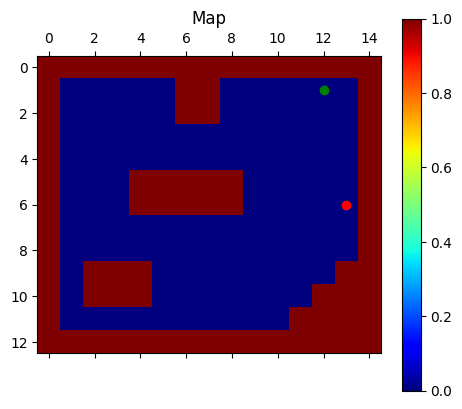

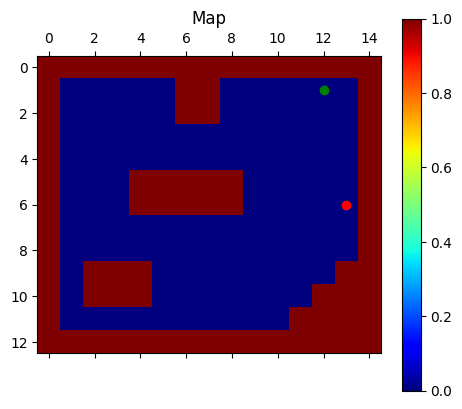

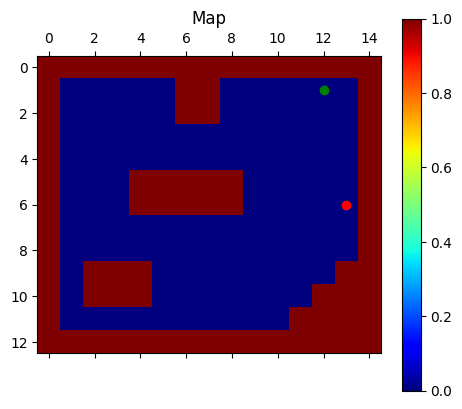

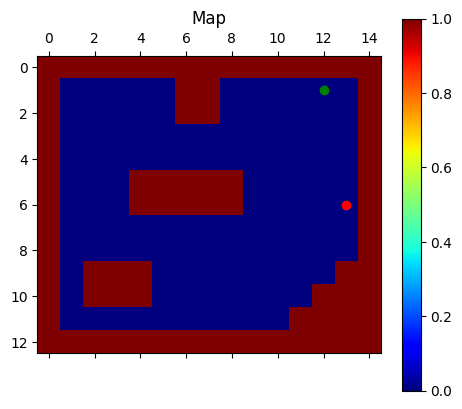

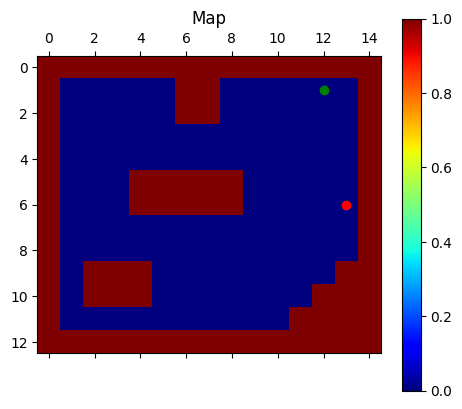

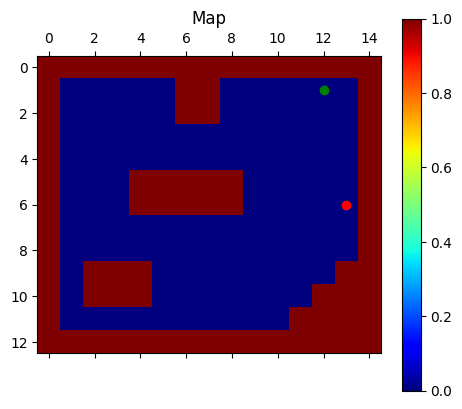

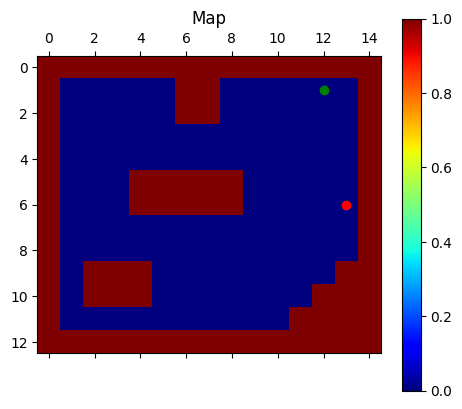

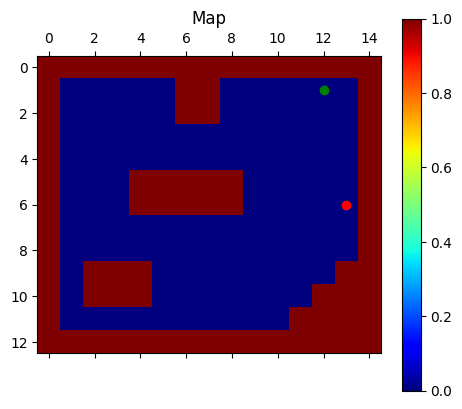

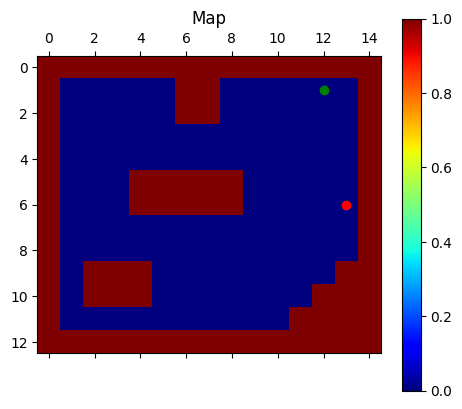

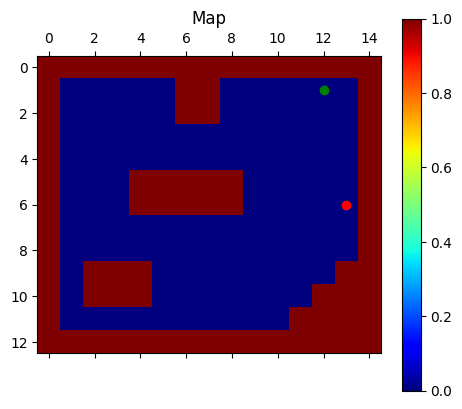

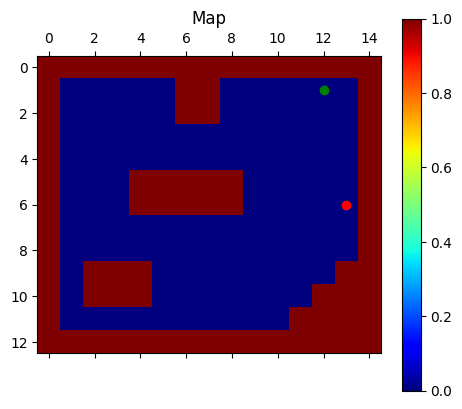

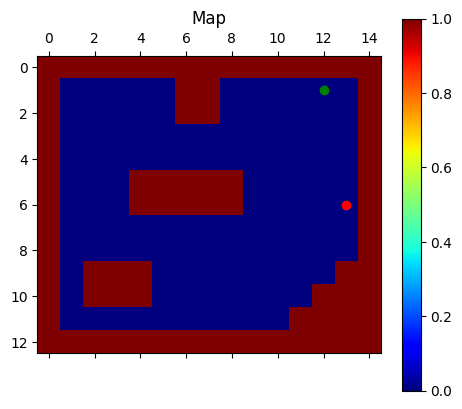

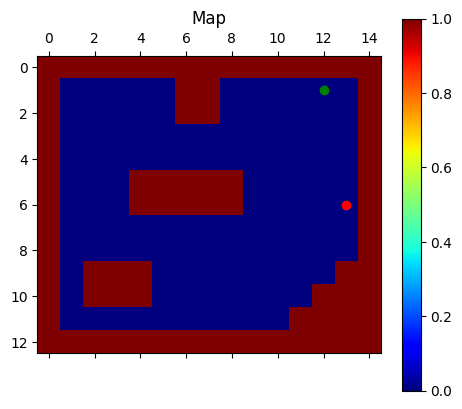

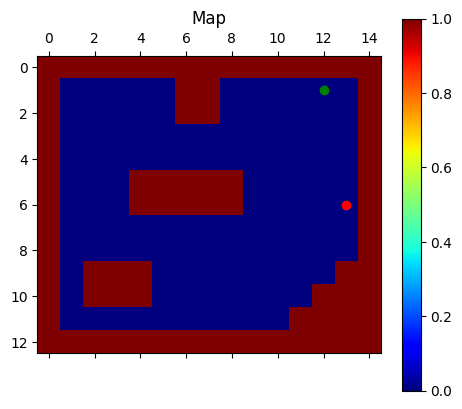

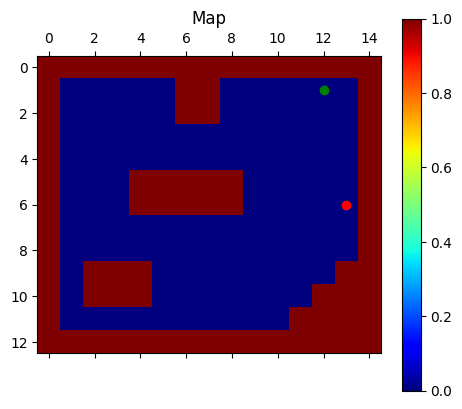

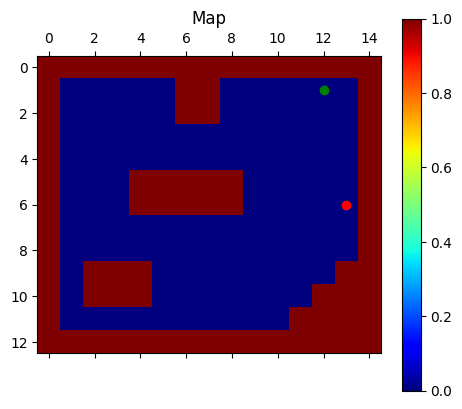

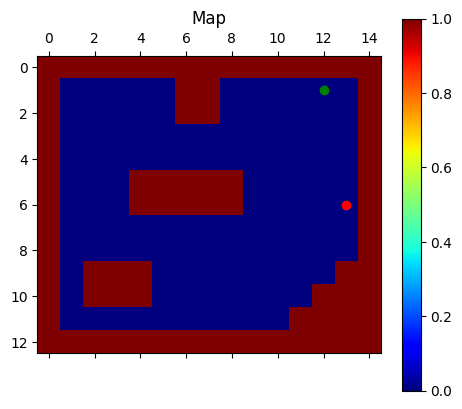

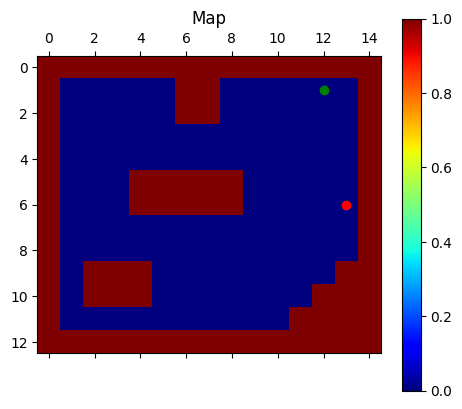

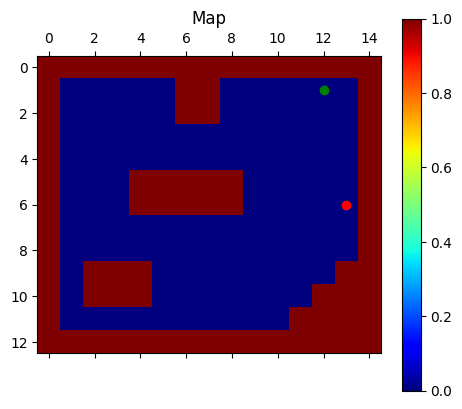

In [8]:
# generate an animation with the agent solving the maze

env = MapEnv(grid_map, np.array([1, 12]), max_steps)
i = 0

for j in range(1):
    episode_termination = False
    s = env.get_state()
    while not episode_termination:
        a = policy[s[0], s[1]]
        s, reward, episode_termination = env.step(a)
        env.render(i)
        i += 1

Average reward for episodes 1 to 100: -91.08
Average reward for episodes 101 to 200: -69.84
Average reward for episodes 201 to 300: -55.13
Average reward for episodes 301 to 400: -45.94
Average reward for episodes 401 to 500: -40.23
Average reward for episodes 501 to 600: -32.23
Average reward for episodes 601 to 700: -27.41
Average reward for episodes 701 to 800: -31.10
Average reward for episodes 801 to 900: -21.90
Average reward for episodes 901 to 1000: -23.20
Average reward for episodes 1001 to 1100: -19.41
Average reward for episodes 1101 to 1200: -15.52
Average reward for episodes 1201 to 1300: -14.32
Average reward for episodes 1301 to 1400: -13.16
Average reward for episodes 1401 to 1500: -15.09
Average reward for episodes 1501 to 1600: -9.67
Average reward for episodes 1601 to 1700: -8.40
Average reward for episodes 1701 to 1800: -12.49
Average reward for episodes 1801 to 1900: -14.25
Average reward for episodes 1901 to 2000: -11.27
Average reward for episodes 2001 to 2100: -

Text(0.5, 1.0, 'Reward per episode')

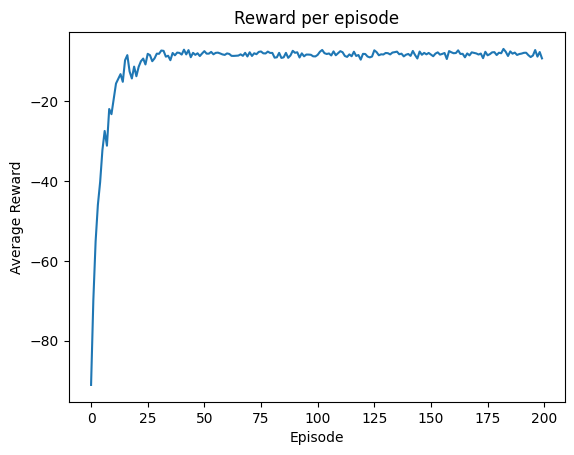

In [12]:
# Create an environment and a QLearning agent to learn it. Plot the averaged rewards stored.

env = MapEnv(grid_map, np.array([1, 12]), max_steps = 100)
alpha = 0.2
gamma = 0.9
epsilon = 0.4
n_episodes = 20000
max_steps = 100
ql = QLearning(env, alpha, gamma, epsilon, n_episodes, max_steps)
rewards = ql.train(n_episodes)
plt.plot(rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("Reward per episode")

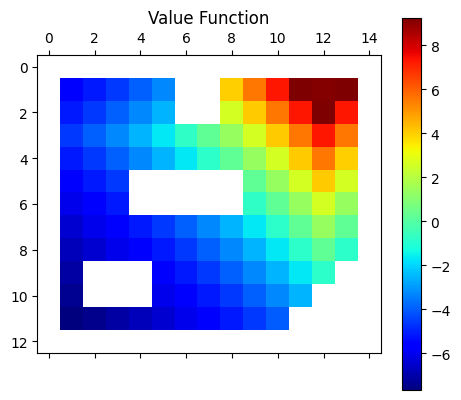

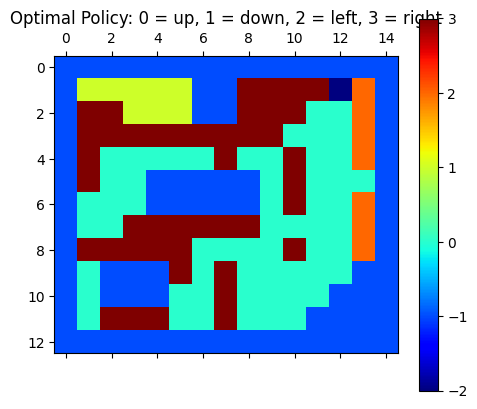

In [13]:
# Plot the value function (see included figure)
v = ql.value_function()
plt.matshow(v, cmap = "jet")
plt.title('Value Function')
plt.colorbar()

# Plot policy (see included figure)
policy = ql.get_optimal_policy()
plt.matshow(policy, cmap = "jet")
plt.title('Optimal Policy: 0 = up, 1 = down, 2 = left, 3 = right')
plt.colorbar()

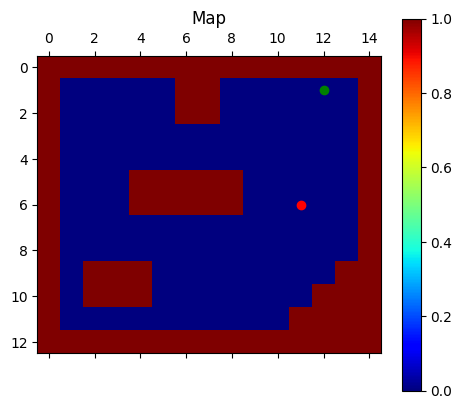

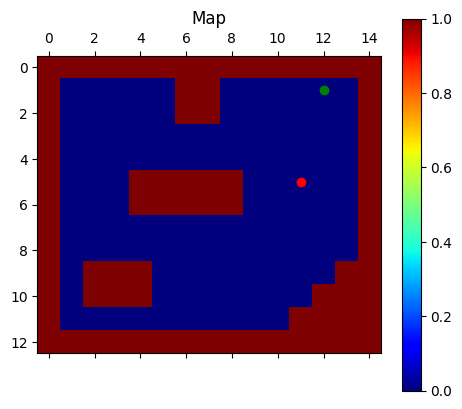

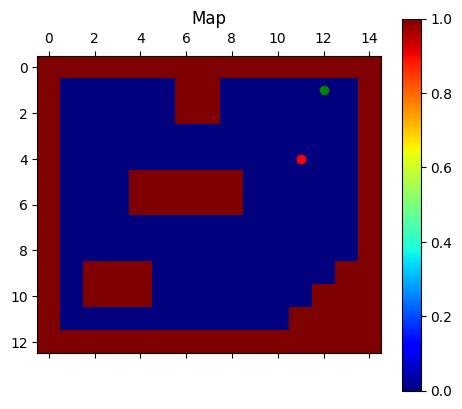

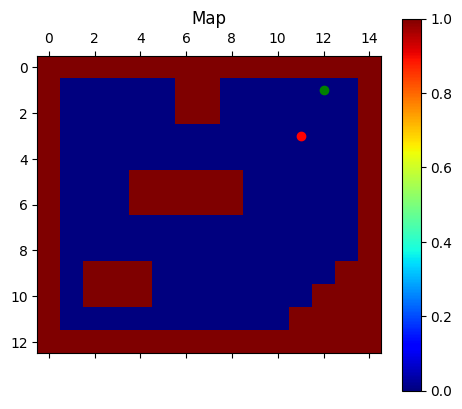

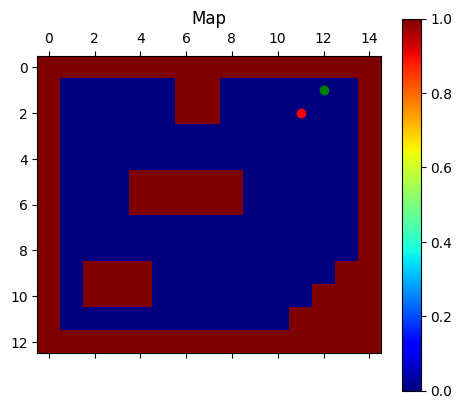

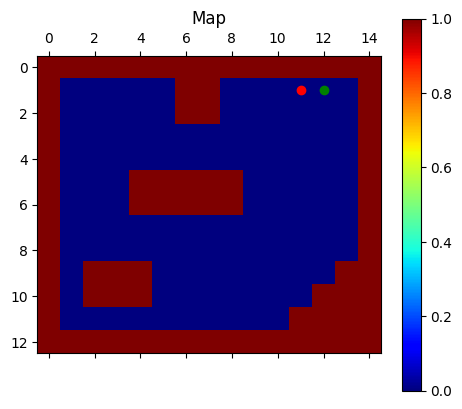

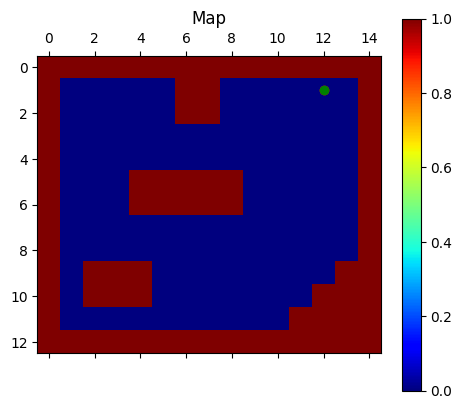

In [18]:
# generate an animation with the agent solving the maze

env = MapEnv(grid_map, np.array([1, 12]), max_steps)
i = 0

for j in range(1):
    episode_termination = False
    s = env.get_state()
    while not episode_termination:
        a = policy[s[0], s[1]]
        s, reward, episode_termination = env.step(a)
        env.render(i)
        i += 1

## Submission

You must deliver this Python Interactive Notebook. The file must have the name q_learning_YOUR_NAME.ipynb. Also, you must do a report commenting the problems you encountered, a discussion on how the parameters affect the training and conclusions for the results obtained.

Make sure that all cells can be executed.